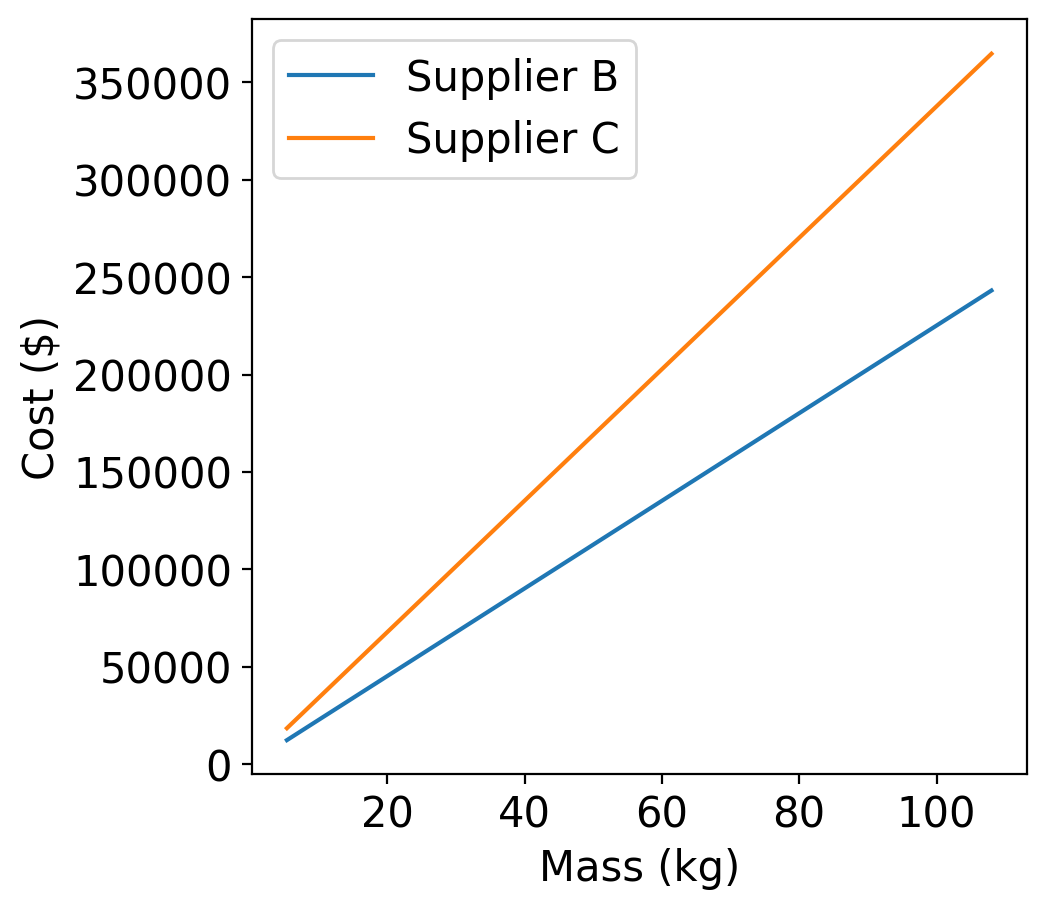

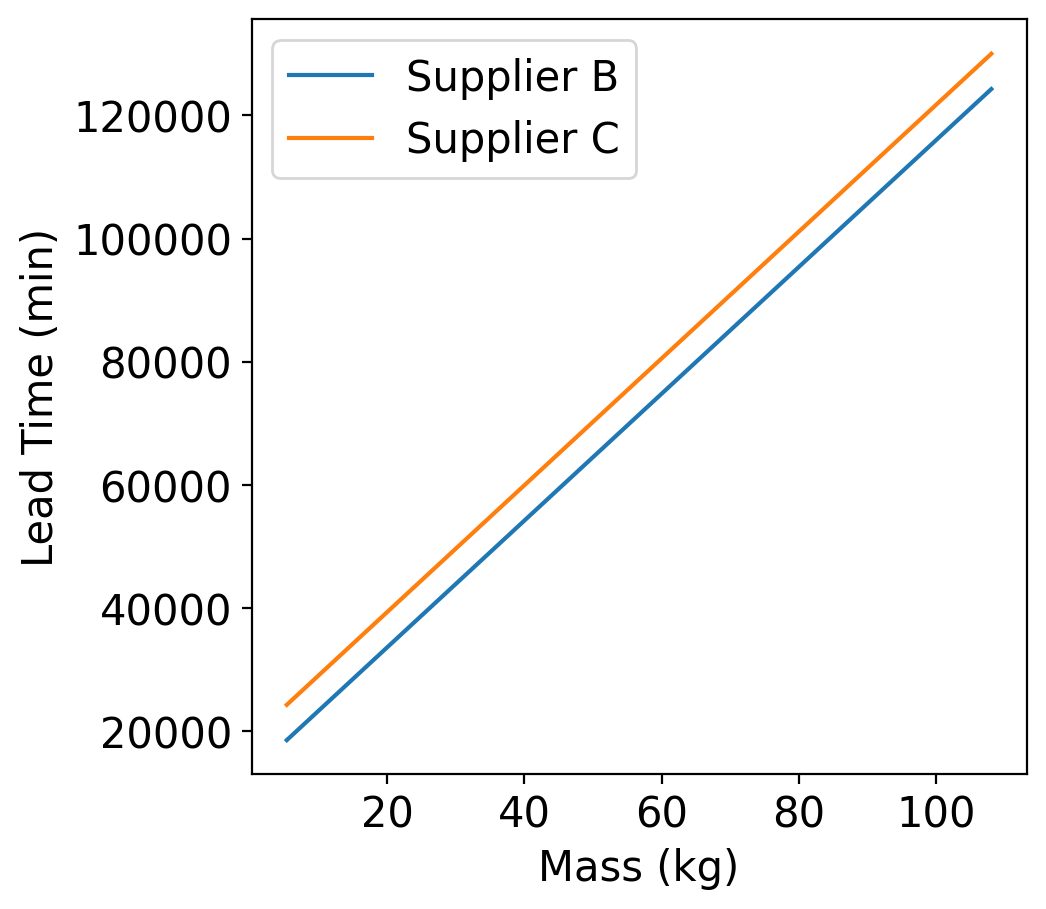

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

folder = 'Past/Iter0/' + 'config_1'
df = pd.read_csv("Studies/EMB_Scenario_2_supplier_test/" + folder + '/probe_results.csv')

dfA = df[df['Supplier'] == 'Supplier-B']
dfB = df[df['Supplier'] == 'Supplier-C']

# print(df['Cost ($)'])
# print(df['Lead Time (min)'])

# print(dfA['Probe'][:-1], dfA['Lead Time (min)'][:-1])

plt.figure(1,dpi = 200, figsize = (5,5))
plt.plot(dfA['Mass (g)'][9:]/1000,dfA['Cost ($)'][9:])
plt.plot(dfB['Mass (g)'][9:]/1000,dfB['Cost ($)'][9:])
plt.xlabel('Mass (kg)',fontsize = '15')
plt.ylabel('Cost ($)',fontsize = '15')
plt.tick_params(axis='both', labelsize=15)
plt.legend(['Supplier B','Supplier C'],fontsize = '15')

plt.figure(2,dpi = 200, figsize = (5,5))
plt.plot(dfA['Mass (g)'][9:]/1000,dfA['Lead Time (min)'][9:])
plt.plot(dfB['Mass (g)'][9:]/1000,dfB['Lead Time (min)'][9:])
plt.xlabel('Mass (kg)',fontsize = '15')
plt.ylabel('Lead Time (min)',fontsize = '15')
plt.tick_params(axis='both', labelsize=15)
plt.legend(['Supplier B','Supplier C'],fontsize = '15')


# plt.figure(1)
# plt.plot(dfA['Probe'],dfA['Cost ($)'])
# plt.plot(dfB['Probe'],dfB['Cost ($)'])
# plt.xlabel('Volume Fraction')
# plt.ylabel('Cost')
# plt.legend(['Supplier B','Supplier C'])

# plt.figure(2)
# plt.plot(dfA['Probe'],dfA['Lead Time (min)'])
# plt.plot(dfB['Probe'],dfB['Lead Time (min)'])
# plt.xlabel('Volume Fraction')
# plt.ylabel('Lead Time')
# plt.legend(['Supplier B','Supplier C'])

# plt.figure(3)
# plt.plot(dfA['Probe'],dfA['Mass (g)'])
# plt.plot(dfB['Probe'],dfB['Mass (g)'])
# plt.xlabel('Volume Fraction')
# plt.ylabel('Mass')
# plt.legend(['Supplier B','Supplier C'])

# plt.figure(4)
# plt.plot(dfA['Probe'],dfA['Compliance (Nm)'])
# plt.plot(dfB['Probe'],dfB['Compliance (Nm)'])
# plt.xlabel('Volume Fraction')
# plt.ylabel('Compliance')
# plt.legend(['Supplier B','Supplier C'])


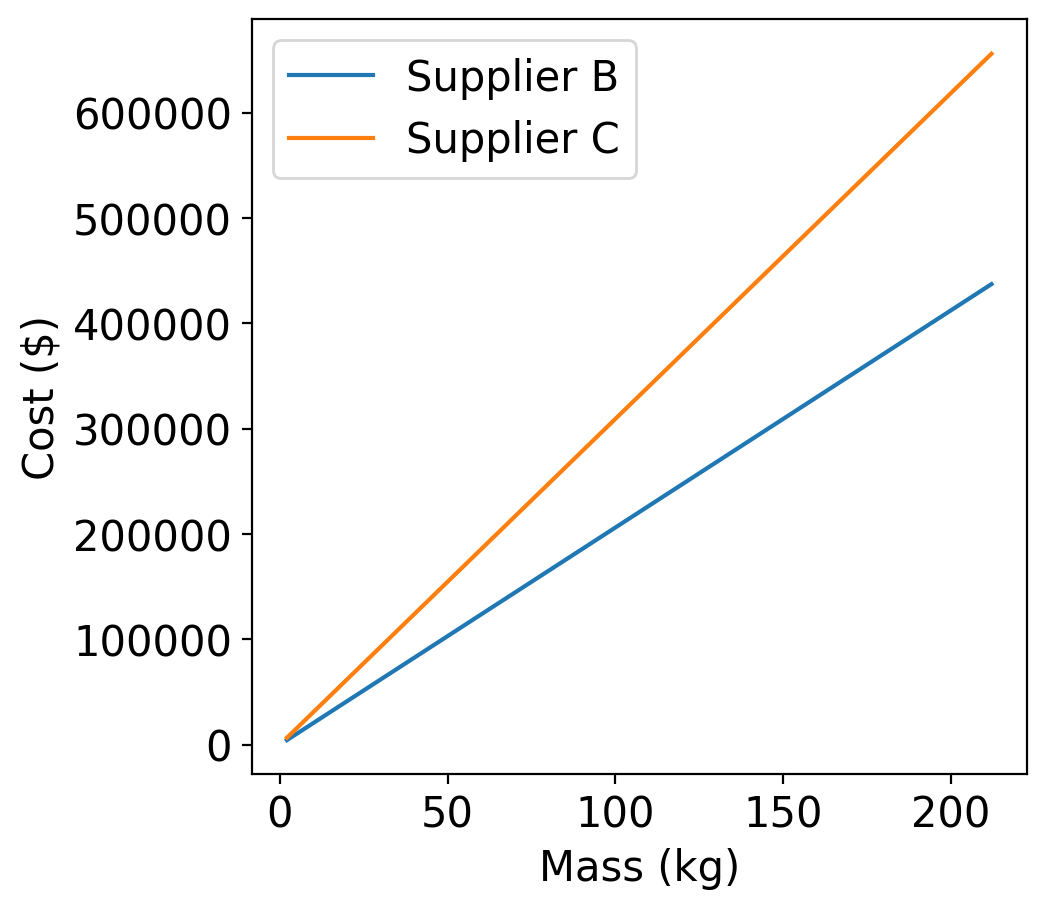

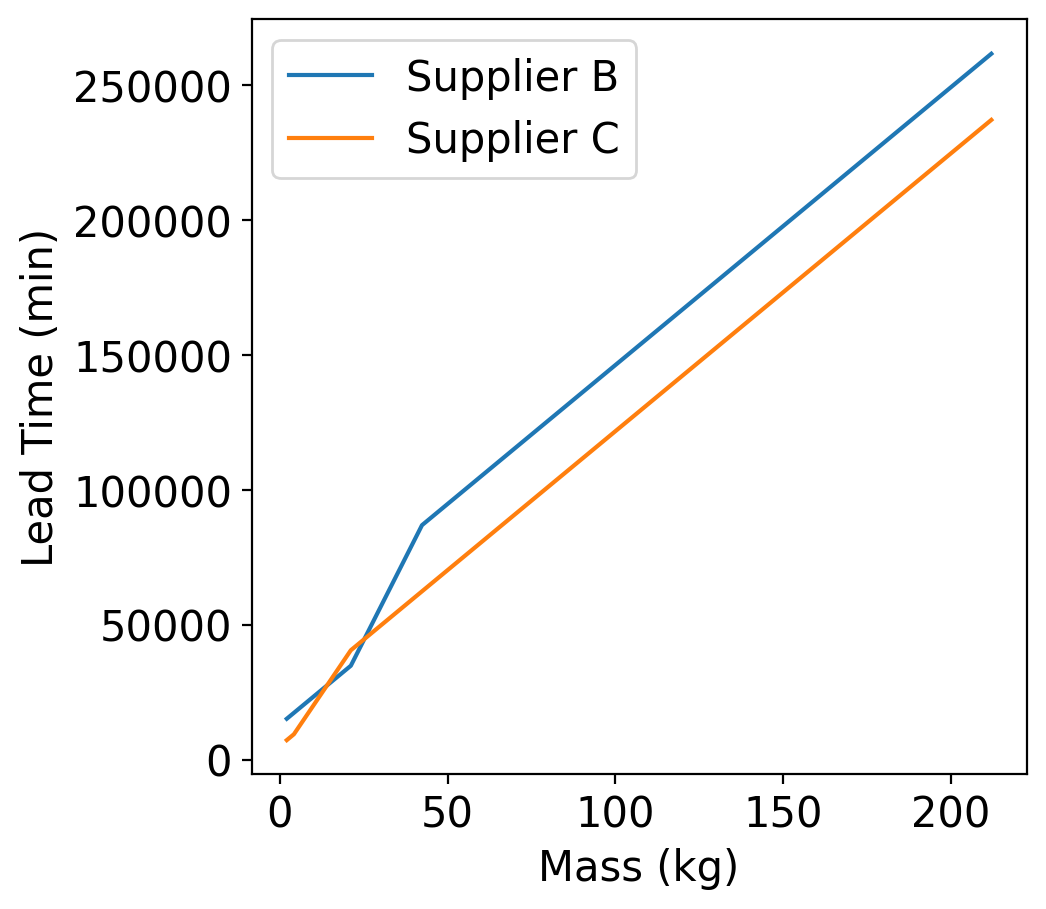

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

folder = 'Past/Iter0/' + 'config_8'
df = pd.read_csv("Studies/EMB_Scenario_2_supplier_test/" + folder + '/probe_results.csv')

dfA = df[df['Supplier'] == 'Supplier-B']
dfB = df[df['Supplier'] == 'Supplier-C']

# print(df['Cost ($)'])
# print(df['Lead Time (min)'])

# print(dfA['Probe'][:-1], dfA['Lead Time (min)'][:-1])

plt.figure(1,dpi = 200, figsize = (5,5))
plt.plot(dfA['Mass (g)'][5:]/1000,dfA['Cost ($)'][5:])
plt.plot(dfB['Mass (g)'][5:]/1000,dfB['Cost ($)'][5:])
plt.xlabel('Mass (kg)',fontsize = '15')
plt.ylabel('Cost ($)',fontsize = '15')
plt.tick_params(axis='both', labelsize=15)
plt.legend(['Supplier B','Supplier C'],fontsize = '15')

plt.figure(2,dpi = 200, figsize = (5,5))
plt.plot(dfA['Mass (g)'][5:]/1000,dfA['Lead Time (min)'][5:])
plt.plot(dfB['Mass (g)'][5:]/1000,dfB['Lead Time (min)'][5:])
plt.xlabel('Mass (kg)',fontsize = '15')
plt.ylabel('Lead Time (min)',fontsize = '15')
plt.tick_params(axis='both', labelsize=15)
plt.legend(['Supplier B','Supplier C'],fontsize = '15')


In [6]:
# folder = 'config_1_2'
# df = pd.read_csv("Studies/MVP_constraints_based_test_2/" + folder + '/probe_results.csv')

# dfA = df[df['Supplier'] == '[\'Supplier-A\']']
# dfB = df[df['Supplier'] == '[\'Supplier-B\']']

# plt.figure(1)
# plt.plot(dfA['Probe'],dfA['Cost'])
# plt.plot(dfB['Probe'],dfB['Cost'])
# plt.xlabel('Volume Fraction')
# plt.ylabel('Cost')
# plt.legend(['Supplier A','Supplier B'])
# print(df['Cost'])

# plt.figure(2)
# plt.plot(dfA['Probe'],dfA['Lead Time'])
# plt.plot(dfB['Probe'],dfB['Lead Time'])
# plt.xlabel('Volume Fraction')
# plt.ylabel('Lead Time')
# plt.legend(['Supplier A','Supplier B'])

# plt.figure(3)
# plt.plot(dfA['Probe'],dfA['mass'])
# plt.plot(dfB['Probe'],dfB['mass'])
# plt.xlabel('Volume Fraction')
# plt.ylabel('Mass')
# plt.legend(['Supplier A','Supplier B'])

# plt.figure(4)
# plt.plot(dfA['Probe'],dfA['compliance'])
# plt.plot(dfB['Probe'],dfB['compliance'])
# plt.xlabel('Volume Fraction')
# plt.ylabel('Compliance')
# plt.legend(['Supplier A','Supplier B'])

In [13]:
import os, shutil
folders = os.listdir("Studies/CB_Scenario_1/Past/Iter0")
for folder in folders:
    if "config" in folder:
        folder = os.path.join("Studies/CB_Scenario_1/Past/Iter0",folder)
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            if "mmm.json" not in file_path:
                try:
                    if os.path.isfile(file_path) or os.path.islink(file_path):
                        os.unlink(file_path)
                    elif os.path.isdir(file_path):
                        shutil.rmtree(file_path)
                except Exception as e:
                    print('Failed to delete %s. Reason: %s' % (file_path, e))

In [1]:
import numpy as np
import json
import requests

request = json.load(open("Studies\EMB_Scenario_2_supplier_test\Past\Iter0\config_1\PartProcessPlans.json"))
r = requests.post('http://localhost:9090/generate-bid', data=json.dumps(request))
print(f"Status Code: {r.status_code}, Response: {r.json()}")
data = r.json()["data"]
print('lead time B: ',round(data[0]['leadTime']/60))
print('lead time C: ',round(data[1]['leadTime']/60))


Status Code: 200, Response: {'status': 'success', 'data': [{'id': 1, 'suppliers': 'Supplier-B', 'order': 'Request-A', 'processPlan': 'SLM-Additive-1', 'leadTime': 4015309, 'earliestStartTime': '2023-11-15T00:00:00+0000', 'earliestFinishTime': '2023-12-22T11:21:49+0000', 'cost': 117853.98}, {'id': 2, 'suppliers': 'Supplier-C', 'order': 'Request-A', 'processPlan': 'SLM-Additive-1', 'leadTime': 4359109, 'earliestStartTime': '2023-11-09T12:00:00+0000', 'earliestFinishTime': '2023-12-26T10:51:49+0000', 'cost': 176780.98}]}
lead time B:  66922
lead time C:  72652


1
vf_arr:  [[-1.          0.06339446]
 [-1.          0.0479581 ]]
mass_vf,time_vf,cost_vf 0.46296296296296285 0.06339446242358866 0.047958098582760705
cost_vf
opt1.time_con tf.Tensor(70590.0, shape=(), dtype=float32)
opt1.cost_con tf.Tensor(116666.66, shape=(), dtype=float32)


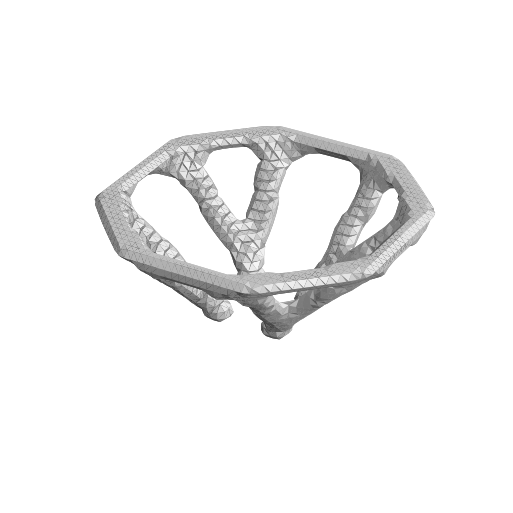

## Result Summary
VF:  tf.Tensor(0.049643546, shape=(), dtype=float32)
Mass: 53.615032 [kg]
Compliance: 1.341430e+00
Time: 53961.82 [min]
Cost: 117853.62 [$]
cutoff 0.49183673469387756
cutoff mass:  tf.Tensor(53.74687500000001, shape=(), dtype=float64)


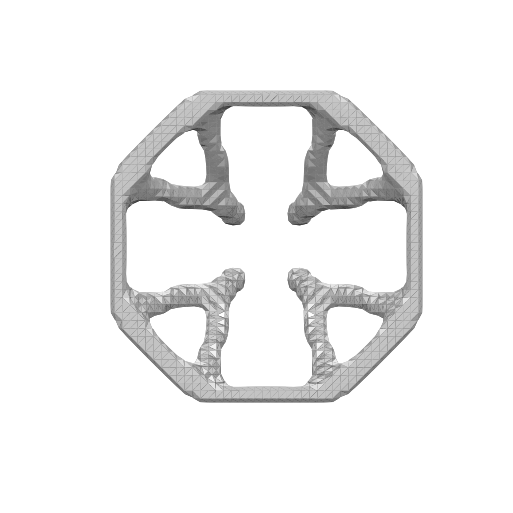

In [2]:
from optimization_sp import run_opt
from optimization_sp import run_batch_opt
import os

# run_batch_opt("Studies/MVP_format_test_1/request_header.json","Studies/MVP_format_test_1","Studies/MVP_format_test_1/bc.json","Resources/mat_lib.json",'Resources/machine.json')

study_folder = "Studies/EMB_Scenario_2_supplier_test"
for i in range(1,2):
    print(i)
    folder_name = "Past/Iter0/"+"config_{}".format(i)
    config_path = os.path.join(study_folder, folder_name)
    # run_opt(os.path.join(study_folder,"Past/Iter0/request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"Past/Iter0/constraints.json"),probe = True, test = False)
    run_opt(os.path.join(study_folder,"Past/Iter0/request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"Past/Iter0/constraints.json"),probe = False, test = True)


8
vf_arr:  [[-1.          0.10534205]
 [-1.          0.20004153]]
mass_vf,time_vf,cost_vf 0.99999 0.10534204982597545 0.2000415302056472
cost_vf
opt1.time_con tf.Tensor(46074.99, shape=(), dtype=float32)
opt1.cost_con tf.Tensor(174999.0, shape=(), dtype=float32)
cutoff 0.49183673469387756
cutoff mass:  tf.Tensor(45.01687500000001, shape=(), dtype=float64)


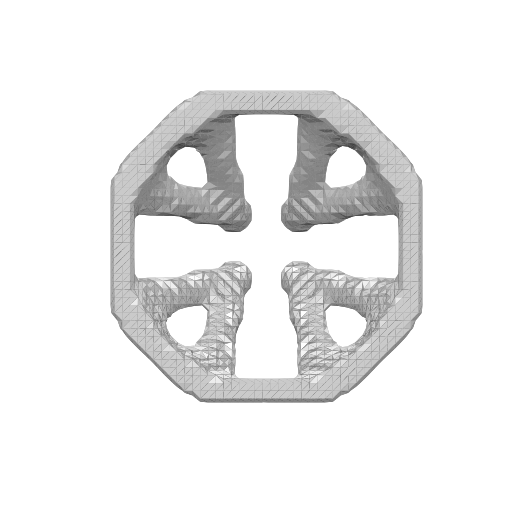

In [2]:
from optimization_sp import run_opt
from optimization_sp import run_batch_opt
import os

study_folder = "Studies/EMB_Scenario_2_supplier_test"
for i in range(8,9):
    print(i)
    folder_name = "Past/Iter0/"+"config_{}".format(i)
    config_path = os.path.join(study_folder, folder_name)
    # run_opt(os.path.join(study_folder,"Past/Iter0/request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"Past/Iter0/constraints.json"),probe = True, test = False)
    run_opt(os.path.join(study_folder,"Past/Iter0/request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"Past/Iter0/constraints.json"),probe = False, test = True)

8
vf_arr:  [[-1.          0.10534205  0.16147642]
 [-1.          0.10510991  0.07003514]]
mass_vf,time_vf,cost_vf 0.99999 0.10534204982597545 0.10510990681373522
cost_vf
opt1.time_con tf.Tensor(46074.99, shape=(), dtype=float32)
opt1.cost_con tf.Tensor(91999.016, shape=(), dtype=float32)


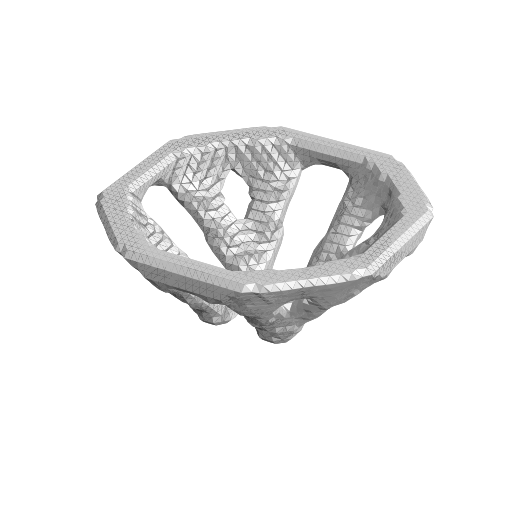

## Result Summary
VF:  tf.Tensor(0.105729274, shape=(), dtype=float32)
Mass: 44.829216 [kg]
Compliance: 1.577579e+01
Time: 46140.16 [min]
Cost: 92332.47 [$]
cutoff 0.49183673469387756
cutoff mass:  tf.Tensor(45.05000000000001, shape=(), dtype=float64)
## Result Summary
VF:  tf.Tensor(0.105729274, shape=(), dtype=float32)
Mass: 44.829216 [kg]
Compliance: 1.342401e+01
Time: 46140.16 [min]
Cost: 92332.47 [$]
Max Disp: 2.1571844428849523 [mm]
comp2 tf.Tensor(15.775793, shape=(), dtype=float32)


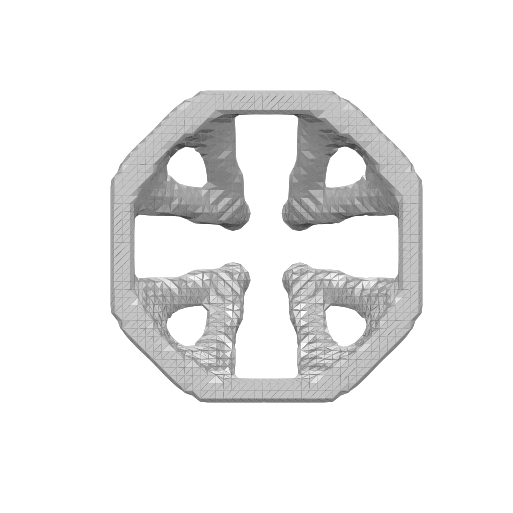

In [1]:
from optimization_sp import run_opt
from optimization_sp import run_batch_opt
import os

study_folder = "Studies/EMB_Scenario_2_supplier_test"
for i in range(8,9):
    print(i)
    folder_name = "config_{}".format(i)
    config_path = os.path.join(study_folder, folder_name)
    # run_opt(os.path.join(study_folder,"Past/Iter0/request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"Past/Iter0/constraints.json"),probe = True, test = False)
    run_opt(os.path.join(study_folder,"request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"constraints.json"),probe = False, test = True)

In [2]:
# from optimization_sp import run_opt
# from optimization_sp import run_batch_opt
# import os

# # run_batch_opt("Studies/MVP_format_test_1/request_header.json","Studies/MVP_format_test_1","Studies/MVP_format_test_1/bc.json","Resources/mat_lib.json",'Resources/machine.json')

# study_folder = "Studies/Engine_Mounting_Bracket_MVP_test"
# for i in range(1,2):
#     print(i)
#     folder_name = "config_{}".format(i)
#     config_path = os.path.join(study_folder, folder_name)
#     run_opt(os.path.join(study_folder,"request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"constraints.json"),probe = True, test = False)
#     run_opt(os.path.join(study_folder,"request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"constraints.json"),probe = False, test = False)


In [1]:
# from optimization_sp import run_opt
# from optimization_sp import run_batch_opt
# import os

# # run_batch_opt("Studies/MVP_format_test_1/request_header.json","Studies/MVP_format_test_1","Studies/MVP_format_test_1/bc.json","Resources/mat_lib.json",'Resources/machine.json')

# study_folder = "Studies/Engine_Mounting_Bracket_MVP_test"
# for i in range(1,10):
#     if i%3!=0:
#         print(i)
#         folder_name = "Past/Iter_passive/"+"config_{}".format(i)
#         config_path = os.path.join(study_folder, folder_name)
#         # run_opt(os.path.join(study_folder,"Past/Iter0/request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"Past/Iter0/constraints.json"),probe = True, test = False)
#         run_opt(os.path.join(study_folder,"Past/Iter_passive/request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"Past/Iter_passive/constraints.json"),probe = False, test = True)

In [4]:
import numpy as np
d = np.array([[1,2,3],[3,4,5]])
print(np.argmax(np.min(d,axis = 0)))

2


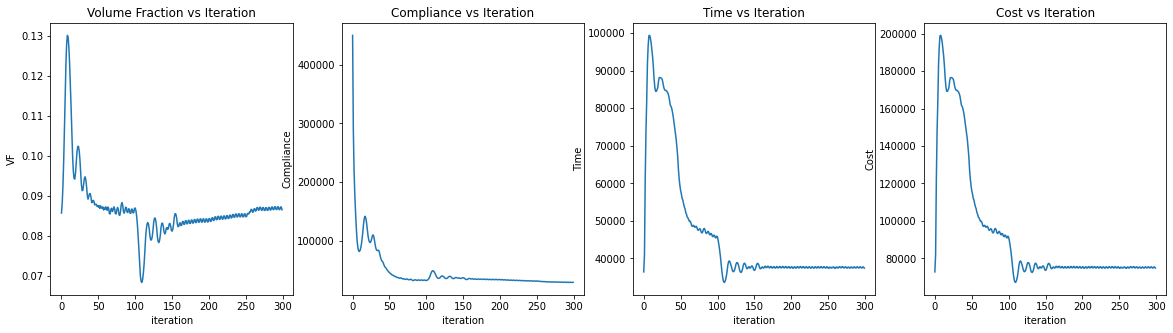

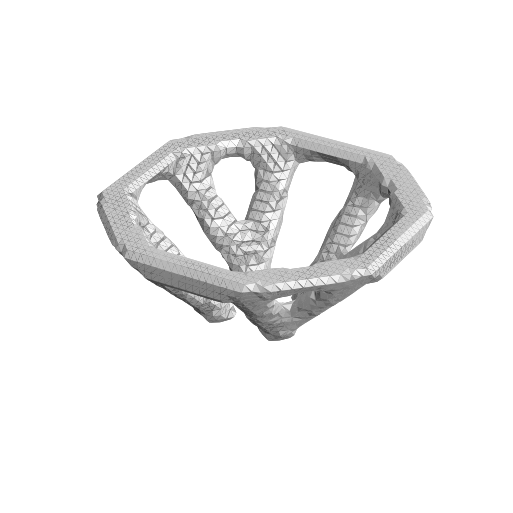

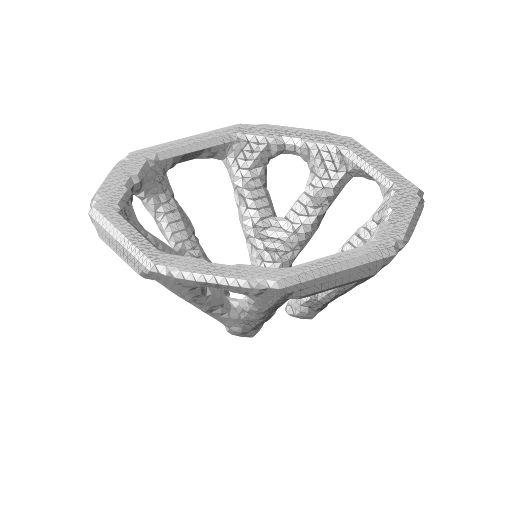

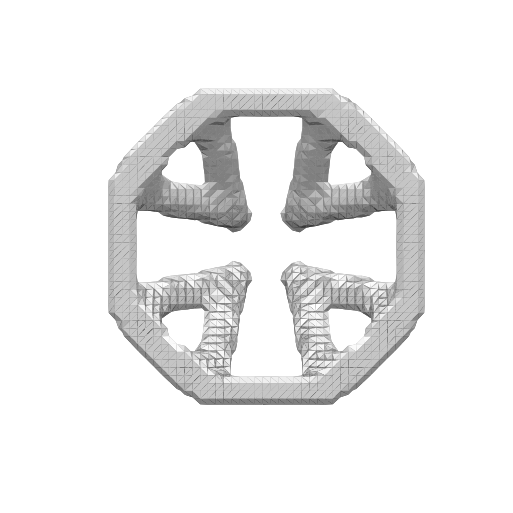

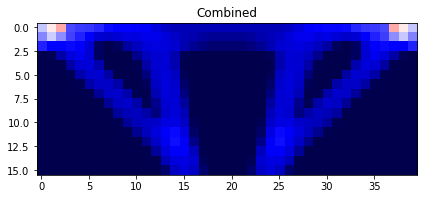

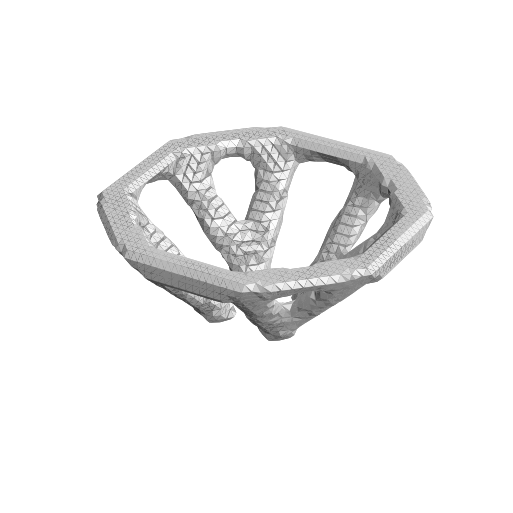

## Result Summary
VF:  tf.Tensor(0.08651966, shape=(), dtype=float32)
Mass: 36.684338 [kg]
Compliance: 1.976345e+01
Time: 37423.80 [min]
Cost: 74882.30 [$]
max d:  0.8089870980647342
comp:  17.30519676208496
Status Code: 200, Response: {'status': 'success', 'data': [{'id': 1, 'suppliers': 'Supplier-B', 'order': 'Request-A', 'processPlan': 'SLM-Additive-1', 'leadTime': 4837728, 'earliestStartTime': '2023-12-06T00:05:00+0000', 'earliestFinishTime': '2023-12-31T23:48:48+0000', 'cost': 74882.71}, {'id': 2, 'suppliers': 'Supplier-C', 'order': 'Request-A', 'processPlan': 'SLM-Additive-1', 'leadTime': 3366828, 'earliestStartTime': '2023-11-09T12:00:00+0000', 'earliestFinishTime': '2023-12-14T23:13:48+0000', 'cost': 112324.06}]}
9
vf_arr:  [[-1.39851935  1.          1.        ]
 [ 0.50227823  1.          1.        ]]
mass_vf,time_vf,cost_vf 0.0943396226415094 -1.3985193548387096 0.5022782258064517
cost_vf
opt1.time_con 89280.11228011698
opt1.cost_con 74999.15960179895
mass_vf:  0.0943396226415

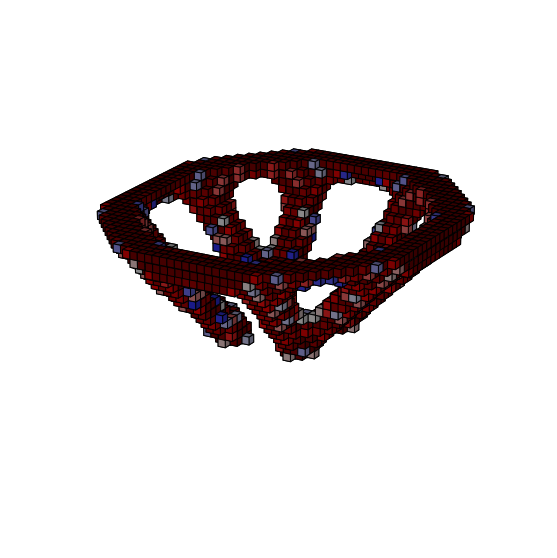

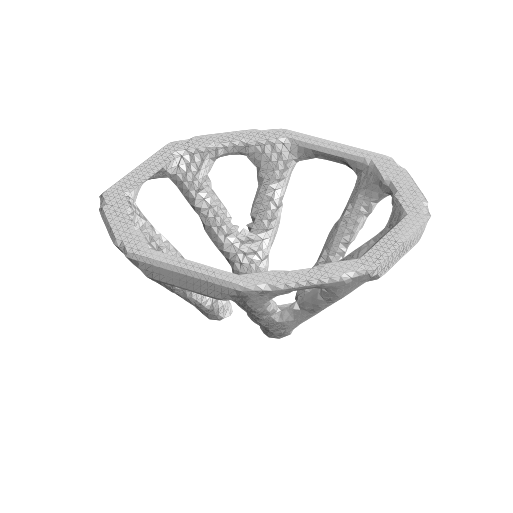

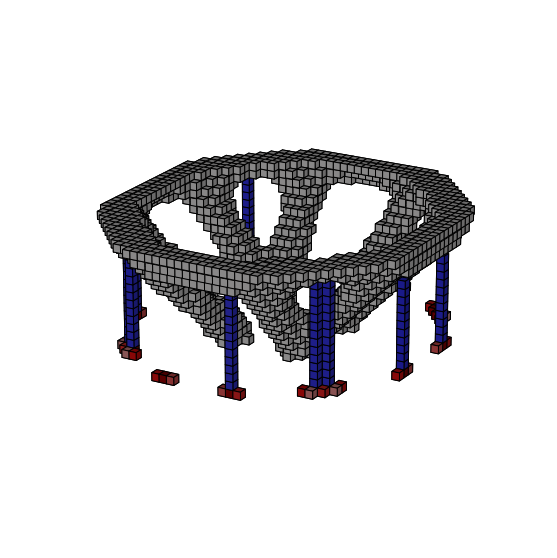

In [1]:
from optimization_sp import run_opt
from optimization_sp import run_batch_opt
import os

# run_batch_opt("Studies/MVP_format_test_1/request_header.json","Studies/MVP_format_test_1","Studies/MVP_format_test_1/bc.json","Resources/mat_lib.json",'Resources/machine.json')

# study_folder = "Studies/EMB_Scenario_2"
# for i in range(1,10):
#     print(i)
#     folder_name = "Past/Iter0/"+"config_{}".format(i)
#     config_path = os.path.join(study_folder, folder_name)
#     # run_opt(os.path.join(study_folder,"Past/Iter0/request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"Past/Iter0/constraints.json"),probe = True, test = False)
#     run_opt(os.path.join(study_folder,"Past/Iter0/request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"Past/Iter0/constraints.json"),probe = False, test = False)

study_folder = "Studies/EMB_Scenario_2"
for i in range(1,10):
    print(i)
    folder_name = "config_{}".format(i)
    config_path = os.path.join(study_folder, folder_name)
    # run_opt(os.path.join(study_folder,"request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"constraints.json"),probe = True, test = False)
    run_opt(os.path.join(study_folder,"request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"constraints.json"),probe = False, test = False)



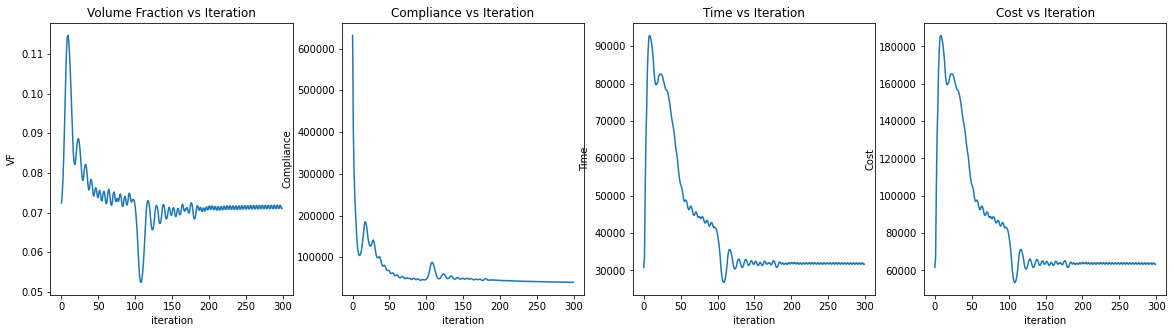

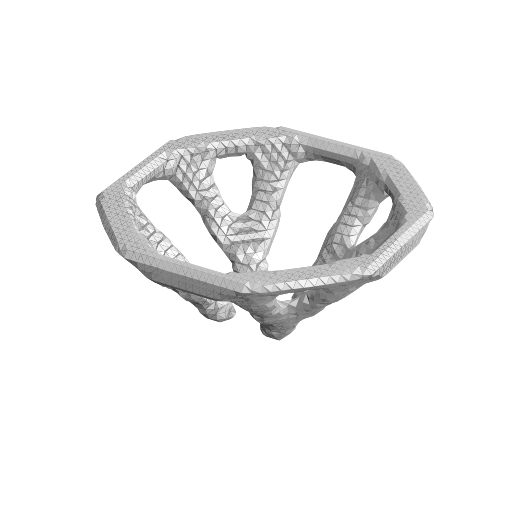

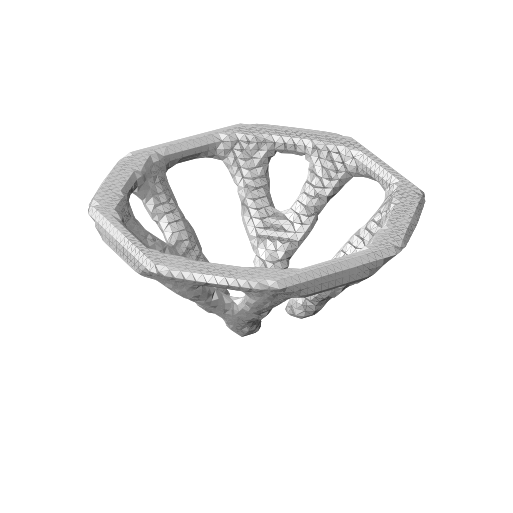

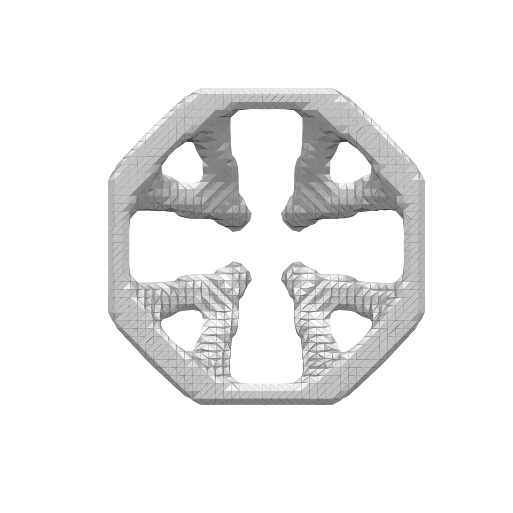

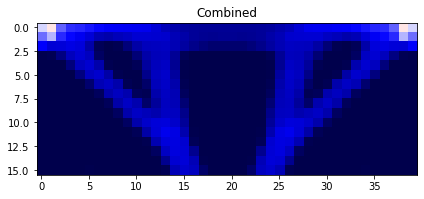

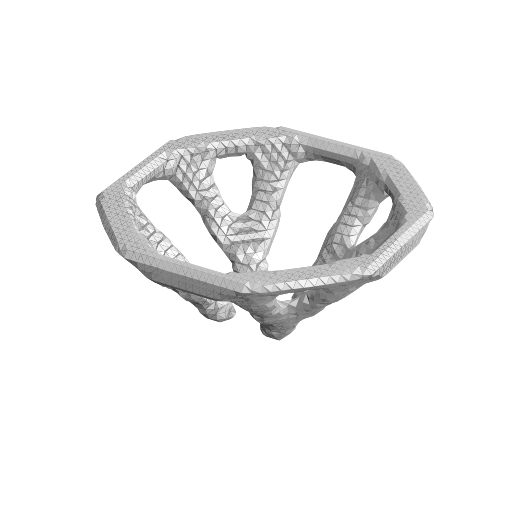

## Result Summary
VF:  tf.Tensor(0.07184918, shape=(), dtype=float32)
Mass: 30.464056 [kg]
Compliance: 2.610382e+01
Time: 31980.06 [min]
Cost: 63983.93 [$]
max d:  2.0623307514370692
comp:  21.20095443725586
Status Code: 200, Response: {'status': 'success', 'data': [{'id': 1, 'suppliers': 'Supplier-B', 'order': 'Request-A', 'processPlan': 'SLM-Additive-1', 'leadTime': 4511104, 'earliestStartTime': '2023-12-06T00:05:00+0000', 'earliestFinishTime': '2023-12-28T05:05:04+0000', 'cost': 63984.82}, {'id': 2, 'suppliers': 'Supplier-C', 'order': 'Request-A', 'processPlan': 'SLM-Additive-1', 'leadTime': 3040204, 'earliestStartTime': '2023-11-09T12:00:00+0000', 'earliestFinishTime': '2023-12-11T04:30:04+0000', 'cost': 95976.73}]}


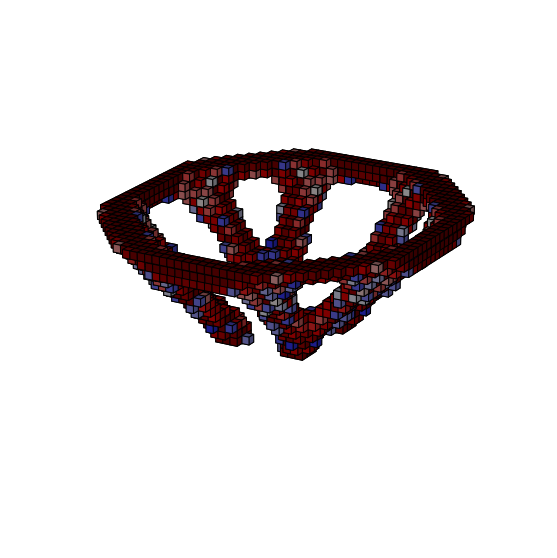

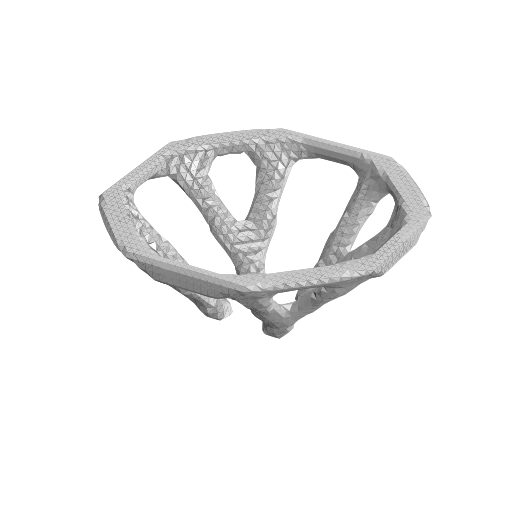

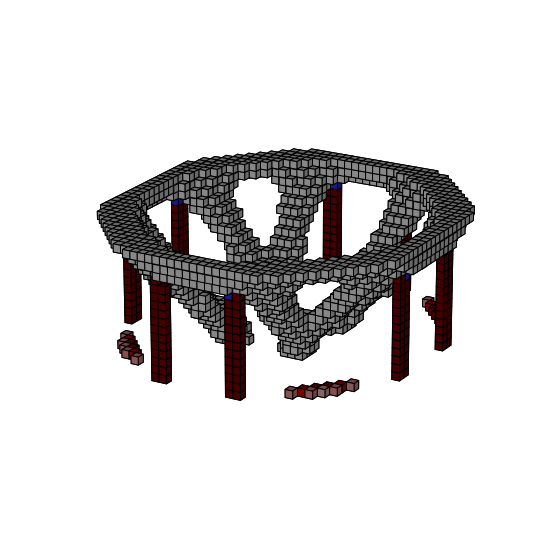

In [1]:
from optimization_sp import run_opt
from optimization_sp import run_batch_opt
import os

# run_batch_opt("Studies/MVP_format_test_1/request_header.json","Studies/MVP_format_test_1","Studies/MVP_format_test_1/bc.json","Resources/mat_lib.json",'Resources/machine.json')

study_folder = "Studies/EMB_Scenario_2"
for i in range(8,9):
    # if i%3 == 0:
    print(i)
    folder_name = "config_{}".format(i)
    config_path = os.path.join(study_folder, folder_name)
    # run_opt(os.path.join(study_folder,"request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"constraints.json"),probe = True, test = False)
    run_opt(os.path.join(study_folder,"request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"constraints.json"),probe = False, test = False)



In [7]:
import os
import json
import requests
#Supply Chain Scheduler Call
directory_path = 'Studies/EMB_Scenario_2/Past/Iter0/config_2'
request = json.load(open(os.path.join(directory_path,"PartProcessPlans.json")))
r = requests.post('http://localhost:9090/generate-bid-and-graph', data=json.dumps(request))
print(f"Status Code: {r.status_code}, Response: {r.json()}")
data = r.json()["data"]

Status Code: 200, Response: {'status': 'success', 'data': [{'id': 1, 'suppliers': 'Supplier-A', 'order': 'Request-A', 'processPlan': '3-Axis-Subtractive-1', 'leadTime': 182577, 'earliestStartTime': '2023-11-06T00:00:00+0000', 'earliestFinishTime': '2023-11-08T02:42:57+0000', 'cost': 14340.0}, {'id': 2, 'suppliers': 'Supplier-C', 'order': 'Request-A', 'processPlan': '3-Axis-Subtractive-1', 'leadTime': 2114652, 'earliestStartTime': '2023-11-09T12:00:00+0000', 'earliestFinishTime': '2023-11-30T11:24:12+0000', 'cost': 170847.0}]}


1
mass_vf,time_vf,cost_vf 0.46296296296296285 0.08019597267170084 0.07861380798274004
opt1.cost_con tf.Tensor(191178.25, shape=(), dtype=float32)
vf: tf.Tensor(0.07393169, shape=(), dtype=float32)
0.5 vf: tf.Tensor(0.07296875, shape=(), dtype=float64)
0.2 mass: tf.Tensor(95.55468750000003, shape=(), dtype=float64)
cutoff 0.44285714285714284
cutoff mass:  tf.Tensor(80.15625000000001, shape=(), dtype=float64)


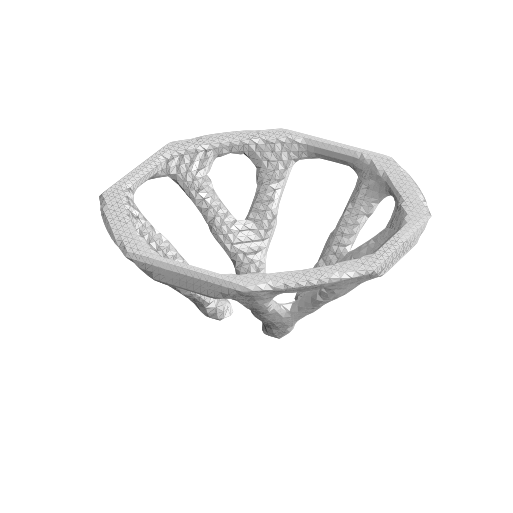

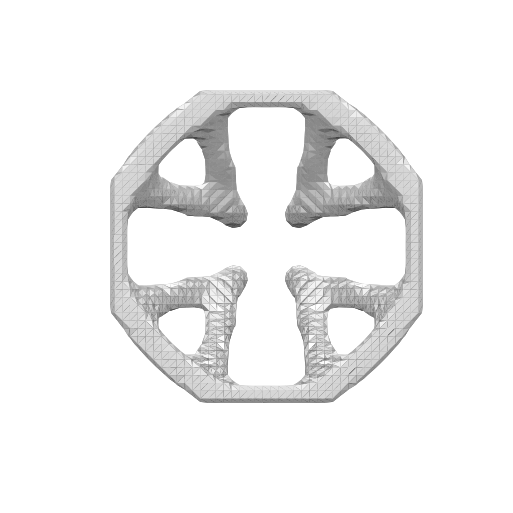

## Result Summary
VF:  tf.Tensor(0.07393169, shape=(), dtype=float32)
Mass: 79.846222 [kg]
Compliance: 8.636348e-01
Time: 85857.19 [min]
Cost: 187545.00 [$]
Max Disp: 0.07318365912608513 [mm]
comp2 tf.Tensor(0.8636348, shape=(), dtype=float32)
2
mass_vf,time_vf,cost_vf 0.46296296296296285 -0.5869270462633451 0.15201902543195478
opt1.cost_con tf.Tensor(162332.72, shape=(), dtype=float32)
vf: tf.Tensor(0.4638382, shape=(), dtype=float32)
0.5 vf: tf.Tensor(0.48421875, shape=(), dtype=float64)
0.2 mass: tf.Tensor(544.0500000000001, shape=(), dtype=float64)
cutoff 0.5571428571428572
cutoff mass:  tf.Tensor(506.41875000000016, shape=(), dtype=float64)


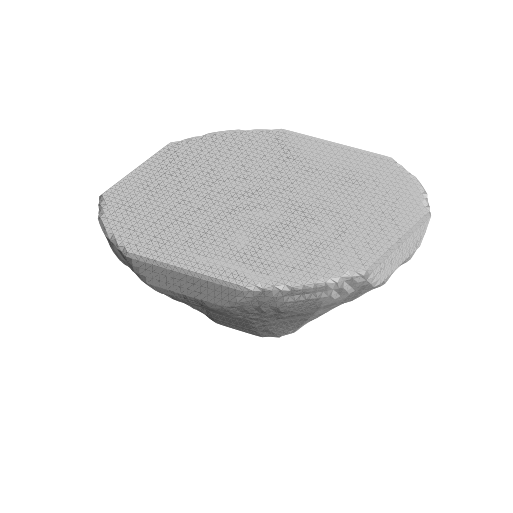

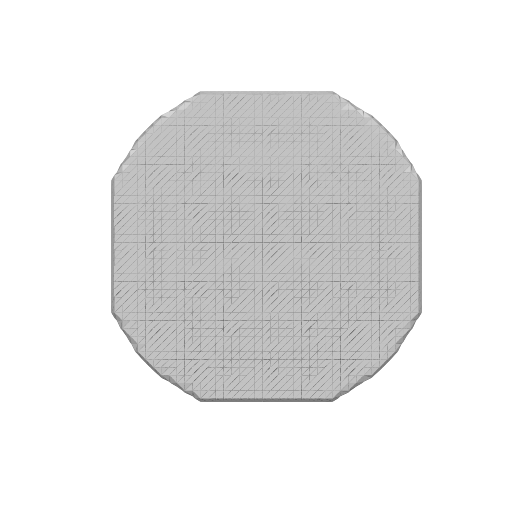

## Result Summary
VF:  tf.Tensor(0.4638382, shape=(), dtype=float32)
Mass: 500.945251 [kg]
Compliance: 1.048407e-01
Time: 33588.50 [min]
Cost: 103930.52 [$]
Max Disp: 0.013628831211592586 [mm]
comp2 tf.Tensor(0.104840726, shape=(), dtype=float32)
3
mass_vf,time_vf,cost_vf 0.46296296296296285 -1.3985193548387096 -0.1754637096774192
opt1.cost_con 178239.37692970727
vf: tf.Tensor(0.46278873, shape=(), dtype=float32)
0.5 vf: tf.Tensor(0.4625, shape=(), dtype=float64)
0.2 mass: tf.Tensor(585.9000000000001, shape=(), dtype=float64)
cutoff 0.4755102040816327
cutoff mass:  tf.Tensor(504.22500000000014, shape=(), dtype=float64)


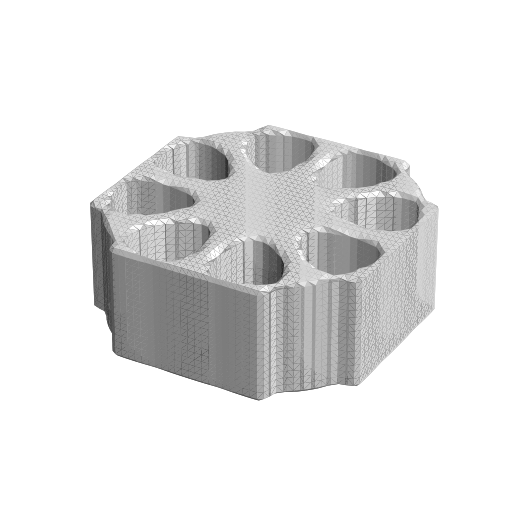

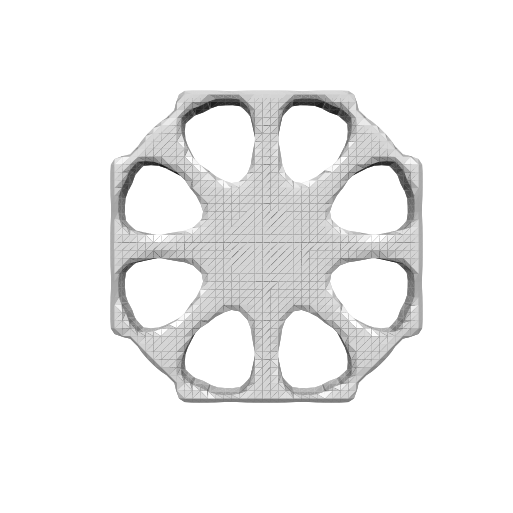

## Result Summary
VF:  tf.Tensor(0.46278873, shape=(), dtype=float32)
Mass: 499.811859 [kg]
Compliance: 1.541121e-01
Time: 12253.71 [min]
Cost: 52124.83 [$]
Max Disp: 0.013671036190906644 [mm]
comp2 tf.Tensor(0.15411215, shape=(), dtype=float32)
4
mass_vf,time_vf,cost_vf 0.28216704288939043 0.0465499302053662 0.04791359614278279
opt1.cost_con tf.Tensor(212516.03, shape=(), dtype=float32)
vf: tf.Tensor(0.046278626, shape=(), dtype=float32)
0.5 vf: tf.Tensor(0.0471875, shape=(), dtype=float64)
0.2 mass: tf.Tensor(101.75156250000003, shape=(), dtype=float64)
cutoff 0.5244897959183674
cutoff mass:  tf.Tensor(82.09343750000002, shape=(), dtype=float64)


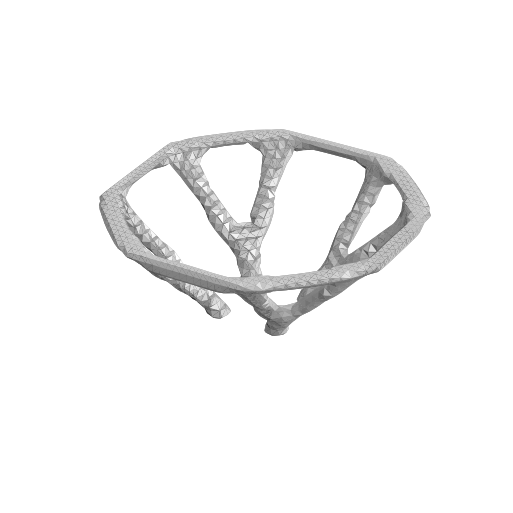

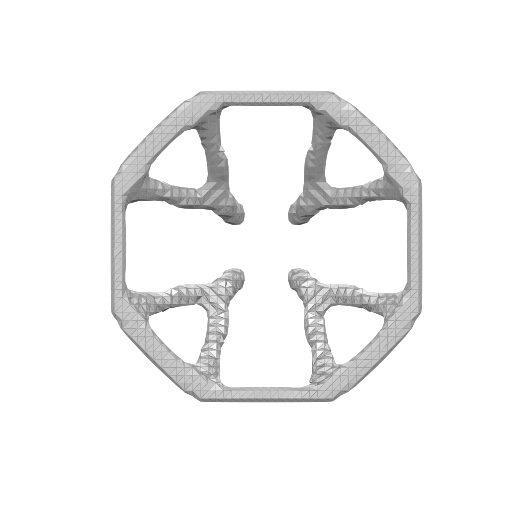

## Result Summary
VF:  tf.Tensor(0.046278626, shape=(), dtype=float32)
Mass: 82.005722 [kg]
Compliance: 9.760221e-01
Time: 83891.98 [min]
Cost: 203703.59 [$]
Max Disp: 0.06242886085049051 [mm]
comp2 tf.Tensor(0.9760222, shape=(), dtype=float32)
5
mass_vf,time_vf,cost_vf 0.28216704288939043 0.8382483647801025 0.913574347253965
opt1.cost_con tf.Tensor(336292.12, shape=(), dtype=float32)
6
mass_vf,time_vf,cost_vf 0.28216704288939043 -1.3985193548387096 -0.1754637096774192
opt1.cost_con 352199.37692970736
vf: tf.Tensor(0.28257778, shape=(), dtype=float32)
0.5 vf: tf.Tensor(0.3, shape=(), dtype=float64)
0.2 mass: tf.Tensor(620.2000000000002, shape=(), dtype=float64)
cutoff 0.5244897959183674
cutoff mass:  tf.Tensor(522.7400000000001, shape=(), dtype=float64)


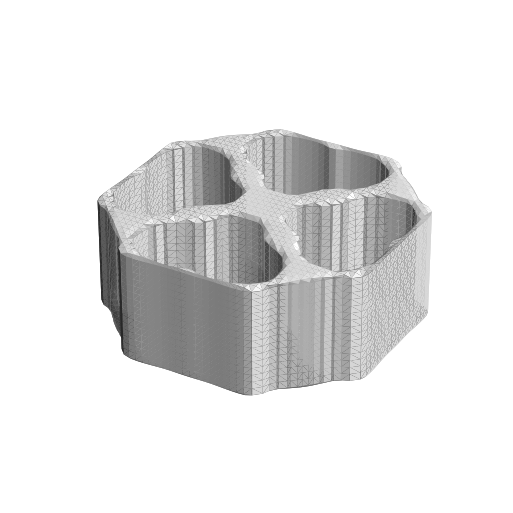

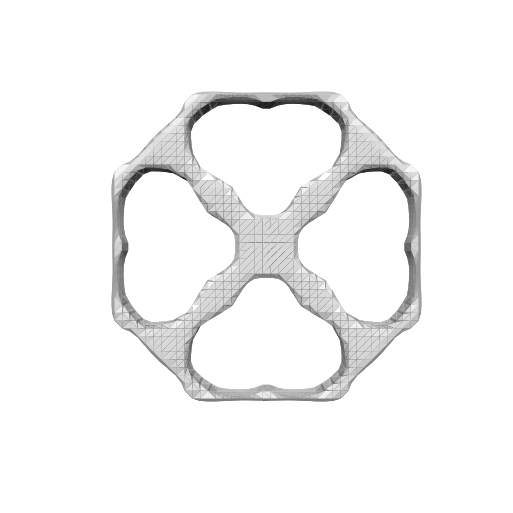

## Result Summary
VF:  tf.Tensor(0.28257778, shape=(), dtype=float32)
Mass: 500.727844 [kg]
Compliance: 2.286607e-01
Time: 12685.12 [min]
Cost: 227810.48 [$]
Max Disp: 0.020614848206953182 [mm]
comp2 tf.Tensor(0.22866075, shape=(), dtype=float32)
7
mass_vf,time_vf,cost_vf 0.99999 -0.5118107833163756 0.19226999537679157
opt1.cost_con tf.Tensor(159937.6, shape=(), dtype=float32)
vf: tf.Tensor(0.9999997, shape=(), dtype=float32)
0.5 vf: tf.Tensor(1.0, shape=(), dtype=float64)
0.2 mass: tf.Tensor(424.00000000000006, shape=(), dtype=float64)
cutoff 0.9
cutoff mass:  tf.Tensor(424.00000000000006, shape=(), dtype=float64)


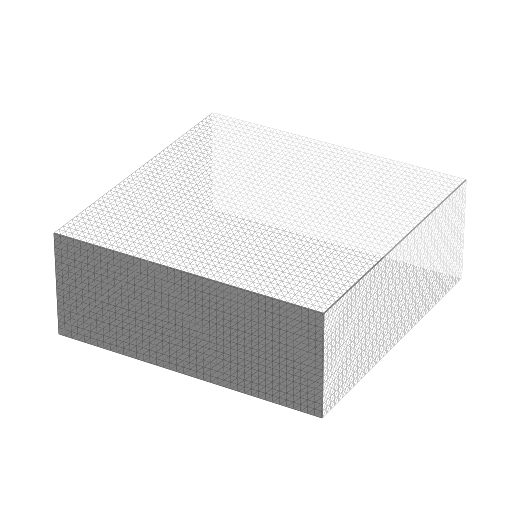

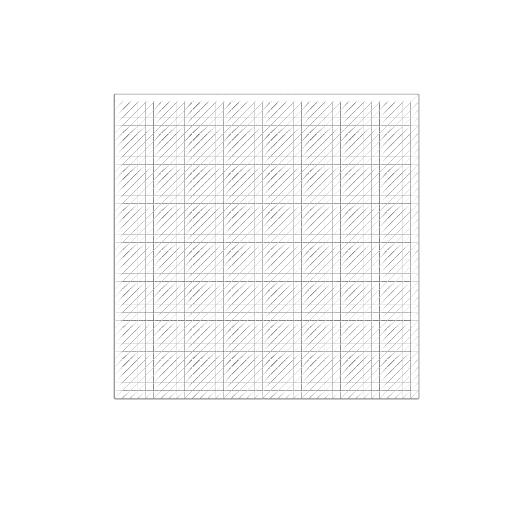

## Result Summary
VF:  tf.Tensor(0.9999997, shape=(), dtype=float32)
Mass: 423.999878 [kg]
Compliance: 2.203766e+00
Time: 115.02 [min]
Cost: 1118.06 [$]
Max Disp: 0.08648851012737017 [mm]
comp2 tf.Tensor(2.2037656, shape=(), dtype=float32)
8
mass_vf,time_vf,cost_vf 0.99999 0.19423860767352344 0.2002415763140721
opt1.cost_con tf.Tensor(175173.92, shape=(), dtype=float32)
vf: tf.Tensor(0.1962698, shape=(), dtype=float32)
0.5 vf: tf.Tensor(0.1909765625, shape=(), dtype=float64)
0.2 mass: tf.Tensor(91.16000000000003, shape=(), dtype=float64)
cutoff 0.3938775510204082
cutoff mass:  tf.Tensor(83.87250000000002, shape=(), dtype=float64)


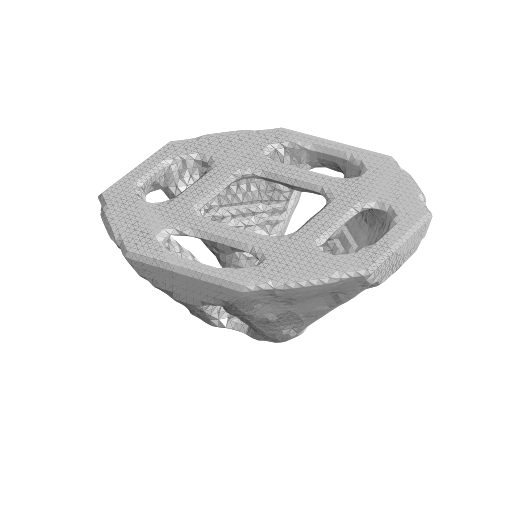

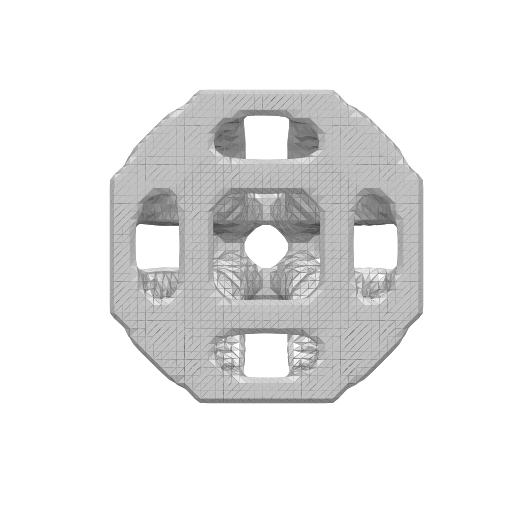

## Result Summary
VF:  tf.Tensor(0.1962698, shape=(), dtype=float32)
Mass: 83.218399 [kg]
Compliance: 7.799273e+00
Time: 85307.13 [min]
Cost: 170744.73 [$]
Max Disp: 0.3524531004921416 [mm]
comp2 tf.Tensor(7.7992725, shape=(), dtype=float32)
9
mass_vf,time_vf,cost_vf 0.99999 -1.3985193548387096 -0.1754637096774192
opt1.cost_con 175847.37692970727
vf: tf.Tensor(0.99999017, shape=(), dtype=float32)
0.5 vf: tf.Tensor(1.0, shape=(), dtype=float64)
0.2 mass: tf.Tensor(424.00000000000006, shape=(), dtype=float64)
cutoff 0.9
cutoff mass:  tf.Tensor(424.00000000000006, shape=(), dtype=float64)


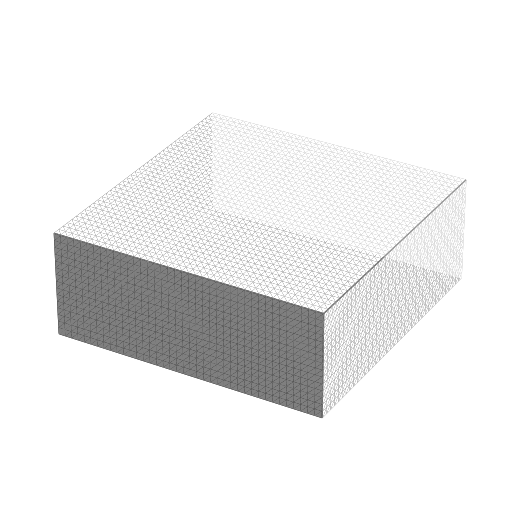

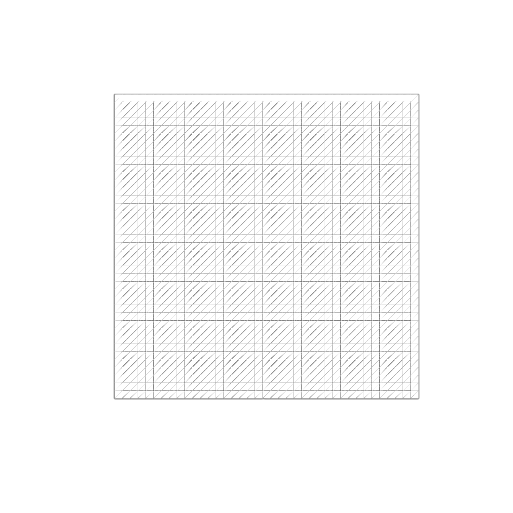

## Result Summary
VF:  tf.Tensor(0.99999017, shape=(), dtype=float32)
Mass: 423.995850 [kg]
Compliance: 2.203717e+00
Time: 329.97 [min]
Cost: 2037.86 [$]
Max Disp: 0.08648873257321821 [mm]
comp2 tf.Tensor(2.2037168, shape=(), dtype=float32)
1
mass_vf,time_vf,cost_vf 0.03703703703703703 0.04006652283351313 0.03366594750089896
opt1.cost_con tf.Tensor(81928.26, shape=(), dtype=float32)
vf: tf.Tensor(0.034570787, shape=(), dtype=float32)
0.5 vf: tf.Tensor(0.034375, shape=(), dtype=float64)
0.2 mass: tf.Tensor(49.95000000000002, shape=(), dtype=float64)
cutoff 0.4591836734693878
cutoff mass:  tf.Tensor(37.46250000000001, shape=(), dtype=float64)


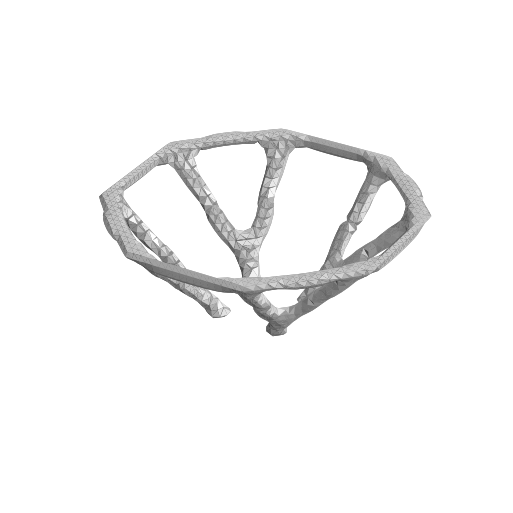

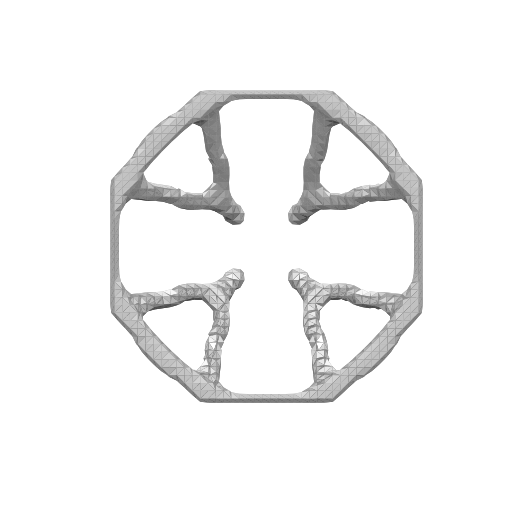

## Result Summary
VF:  tf.Tensor(0.034570787, shape=(), dtype=float32)
Mass: 37.336452 [kg]
Compliance: 2.588863e+00
Time: 37555.95 [min]
Cost: 82006.80 [$]
Max Disp: 0.1816304215005874 [mm]
comp2 tf.Tensor(2.5888631, shape=(), dtype=float32)
2
mass_vf,time_vf,cost_vf 0.03703703703703703 0.2074196017014006 0.6374016894844159
opt1.cost_con tf.Tensor(71422.914, shape=(), dtype=float32)
3
mass_vf,time_vf,cost_vf 0.03703703703703703 -0.19851935483870964 0.4965793010752688
opt1.cost_con 78239.16142924289
4
mass_vf,time_vf,cost_vf 0.022573363431151235 0.024419776896272102 0.02051829936445321
opt1.cost_con tf.Tensor(91064.055, shape=(), dtype=float32)
vf: tf.Tensor(0.021314586, shape=(), dtype=float32)
0.5 vf: tf.Tensor(0.0198828125, shape=(), dtype=float64)
0.2 mass: tf.Tensor(57.24390625000001, shape=(), dtype=float64)
cutoff 0.4591836734693878
cutoff mass:  tf.Tensor(39.24703125000001, shape=(), dtype=float64)


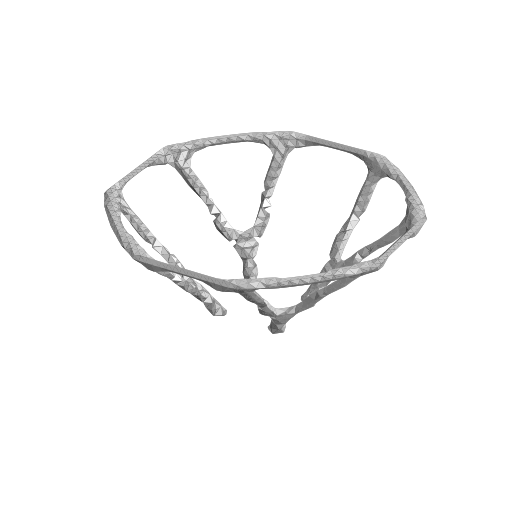

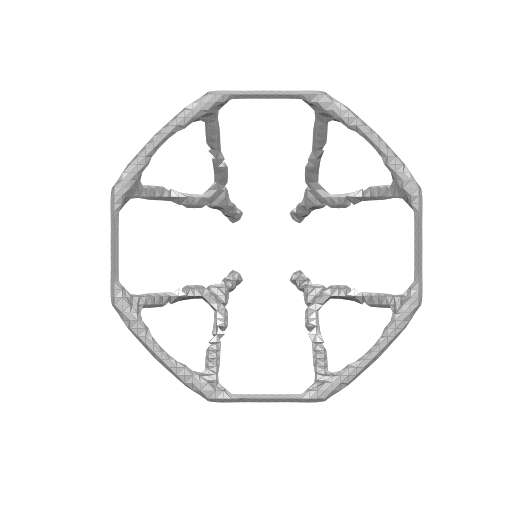

## Result Summary
VF:  tf.Tensor(0.021314586, shape=(), dtype=float32)
Mass: 37.769447 [kg]
Compliance: 3.737313e+00
Time: 38249.24 [min]
Cost: 92837.38 [$]
Max Disp: 0.24403975188875388 [mm]
comp2 tf.Tensor(3.7373128, shape=(), dtype=float32)
5
mass_vf,time_vf,cost_vf 0.022573363431151235 0.9192203184461512 0.9630435427859072
opt1.cost_con tf.Tensor(245383.9, shape=(), dtype=float32)
6
mass_vf,time_vf,cost_vf 0.022573363431151235 -0.19851935483870964 0.4965793010752688
opt1.cost_con 252199.16142924293
7
mass_vf,time_vf,cost_vf 0.0943396226415094 0.24502610700481453 0.6546185852981969
opt1.cost_con tf.Tensor(69028.5, shape=(), dtype=float32)
8
mass_vf,time_vf,cost_vf 0.0943396226415094 0.10205619161018503 0.08575174024546622
opt1.cost_con tf.Tensor(75073.91, shape=(), dtype=float32)
vf: tf.Tensor(0.08498604, shape=(), dtype=float32)
0.5 vf: tf.Tensor(0.0851953125, shape=(), dtype=float64)
0.2 mass: tf.Tensor(41.80375000000001, shape=(), dtype=float64)
cutoff 0.5081632653061224
cutoff m

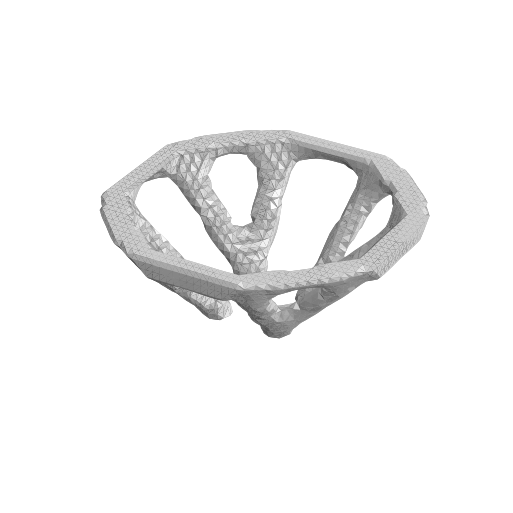

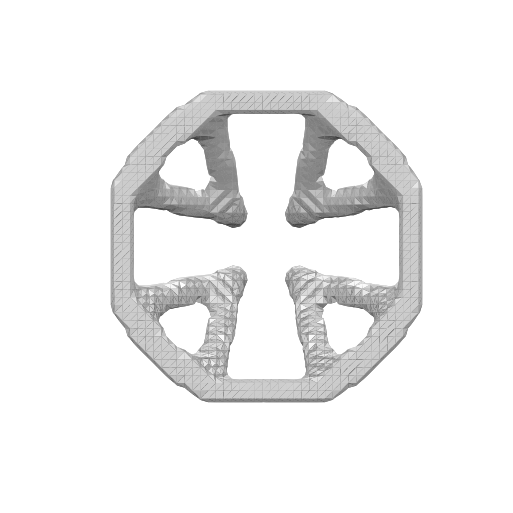

## Result Summary
VF:  tf.Tensor(0.08498604, shape=(), dtype=float32)
Mass: 36.034084 [kg]
Compliance: 2.105843e+01
Time: 37502.85 [min]
Cost: 75040.56 [$]
Max Disp: 2.116936693653057 [mm]
comp2 tf.Tensor(21.058434, shape=(), dtype=float32)
9
mass_vf,time_vf,cost_vf 0.0943396226415094 -0.19851935483870964 0.4965793010752688
opt1.cost_con 75847.16142924289


In [1]:
from optimization_sp import run_opt
from optimization_sp import run_batch_opt
import os

# run_batch_opt("Studies/MVP_format_test_1/request_header.json","Studies/MVP_format_test_1","Studies/MVP_format_test_1/bc.json","Resources/mat_lib.json",'Resources/machine.json')

study_folder = "Studies/Engine_Mounting_Bracket_MVP"
for i in range(1,10):
    print(i)
    folder_name = "Past/Iter0/"+"config_{}".format(i)
    config_path = os.path.join(study_folder, folder_name)
    # run_opt(os.path.join(study_folder,"Past/Iter0/request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"Past/Iter0/constraints.json"),probe = True, test = False)
    run_opt(os.path.join(study_folder,"Past/Iter0/request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"Past/Iter0/constraints.json"),probe = False, test = True)

study_folder = "Studies/Engine_Mounting_Bracket_MVP"
for i in range(1,10):
    print(i)
    folder_name = "config_{}".format(i)
    config_path = os.path.join(study_folder, folder_name)
    # run_opt(os.path.join(study_folder,"request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"constraints.json"),probe = True, test = False)
    run_opt(os.path.join(study_folder,"request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"constraints.json"),probe = False, test = True)



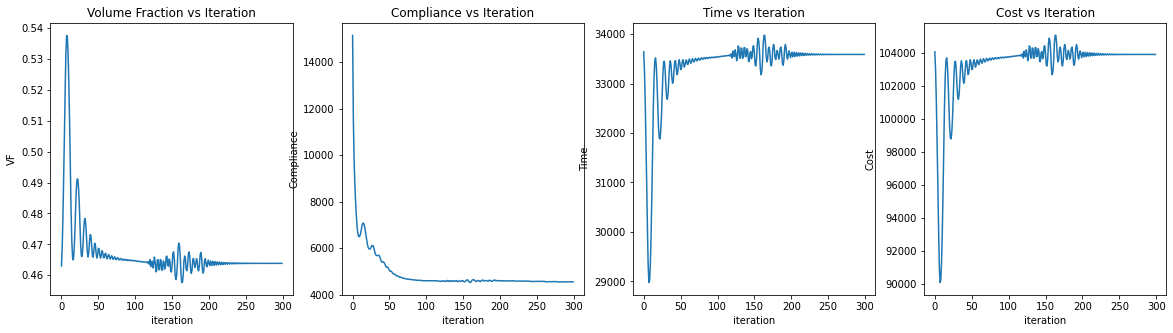

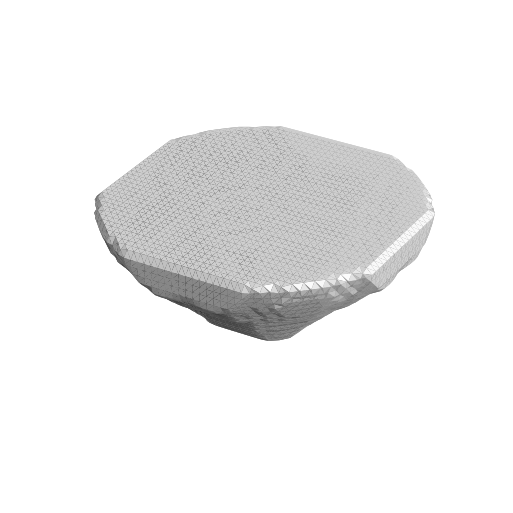

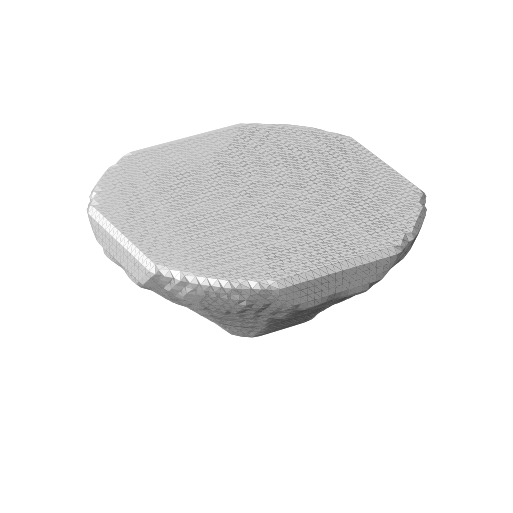

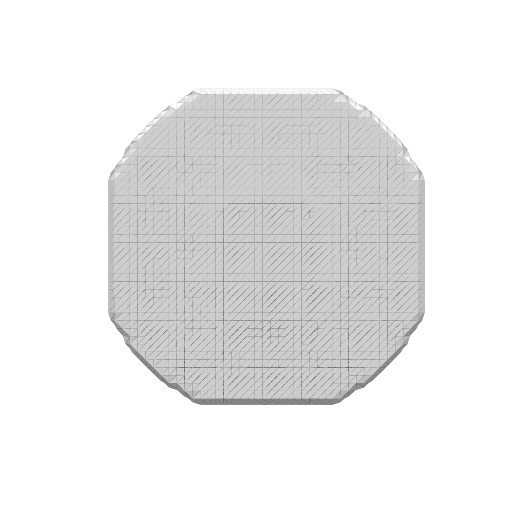

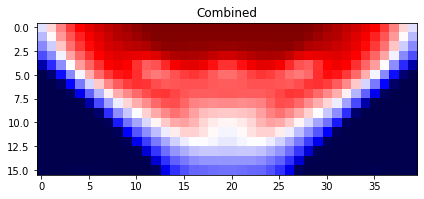

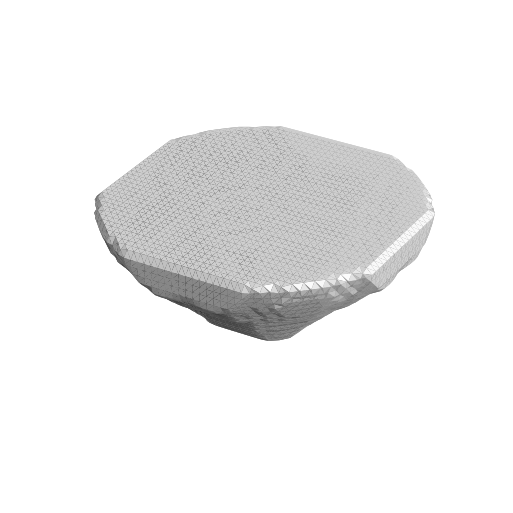

## Result Summary
VF:  tf.Tensor(0.4638412, shape=(), dtype=float32)
Mass: 500.948517 [kg]
Compliance: 1.048245e-01
Time: 33588.32 [min]
Cost: 103929.95 [$]
Status Code: 200, Response: {'status': 'success', 'data': [{'id': 1, 'suppliers': ['Supplier-A'], 'order': 'Request-A', 'processPlan': '3-Axis-Subtractive-1', 'leadTime': 1812188, 'earliestStartTime': '2022-02-05T08:00:00+0000', 'earliestFinishTime': '2022-02-26T07:23:08+0000', 'cost': 110652}]}


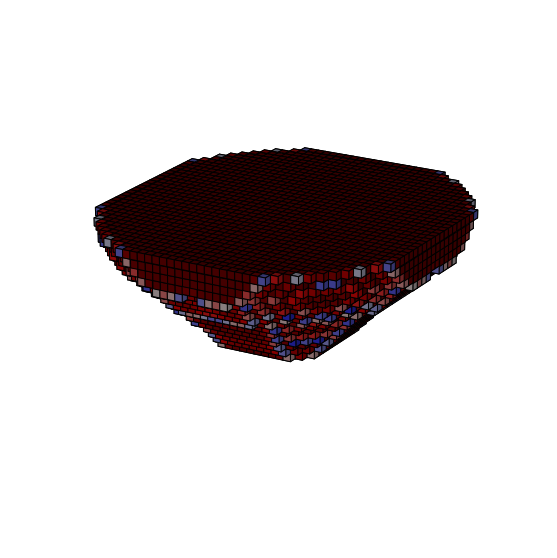

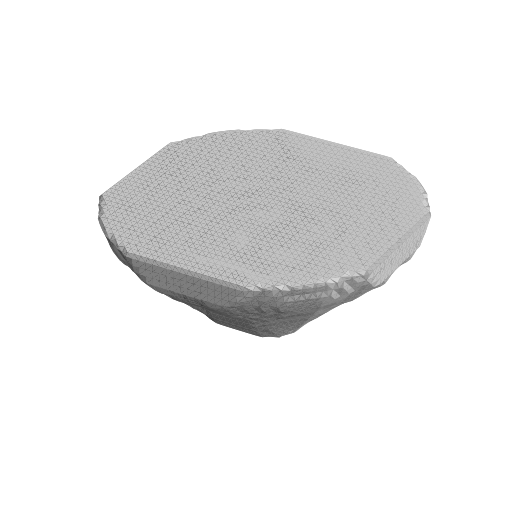

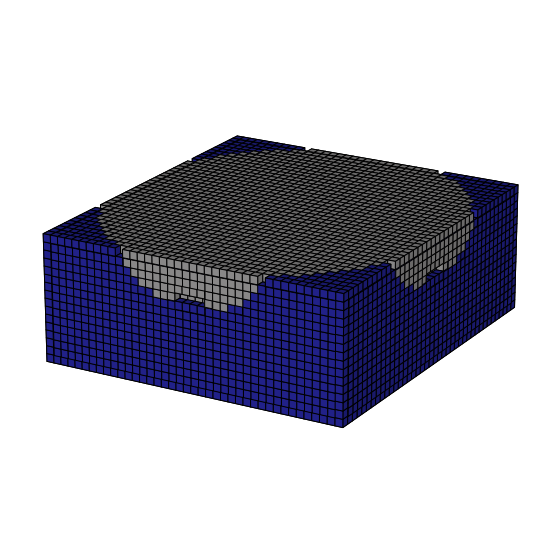

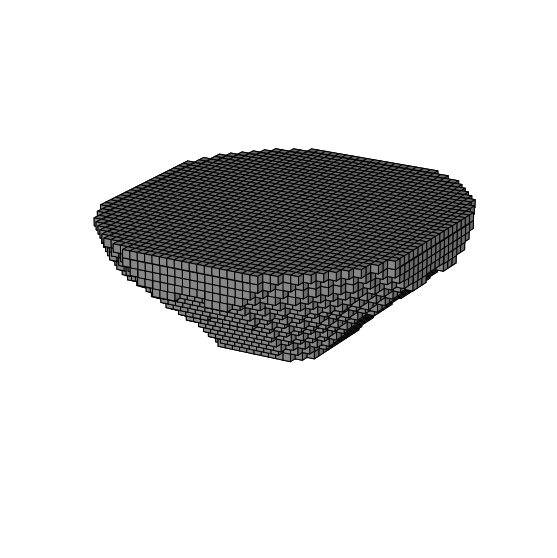

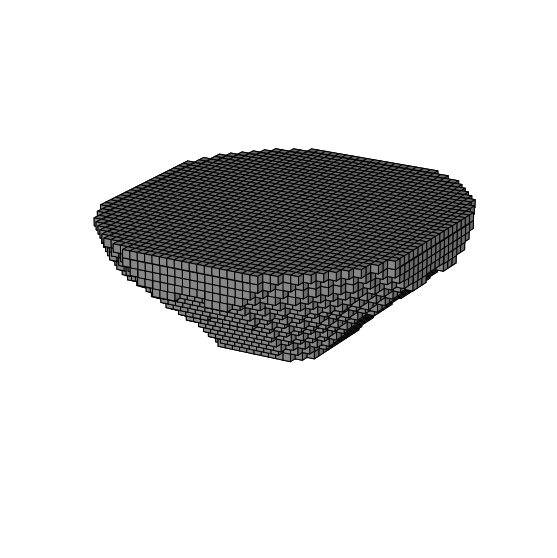

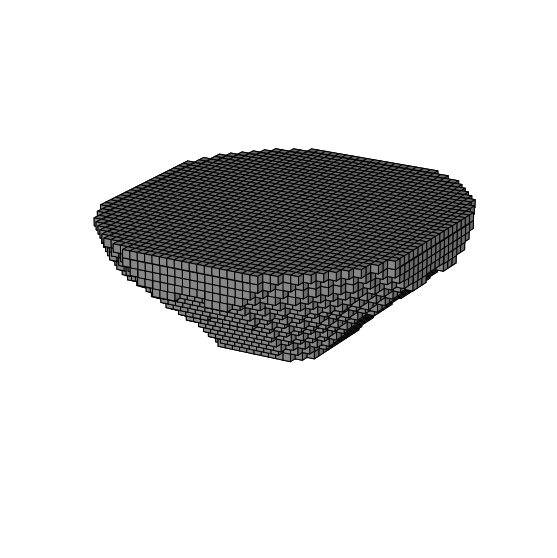

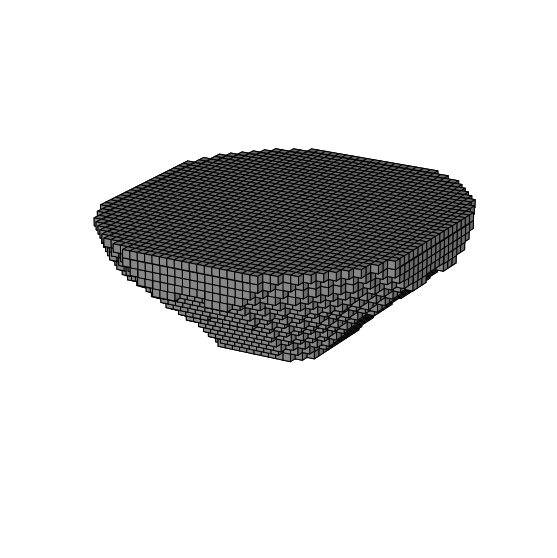

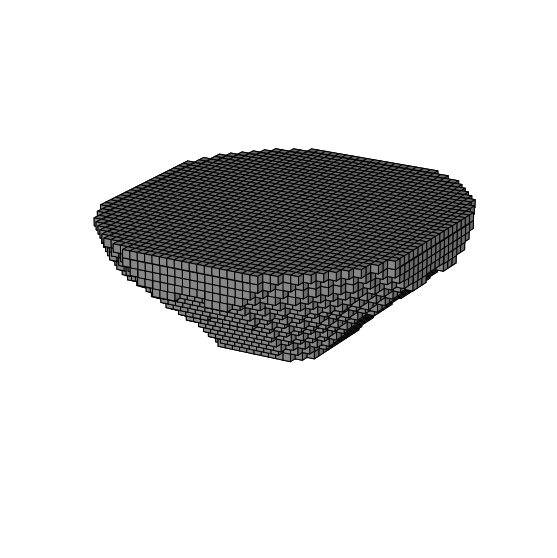

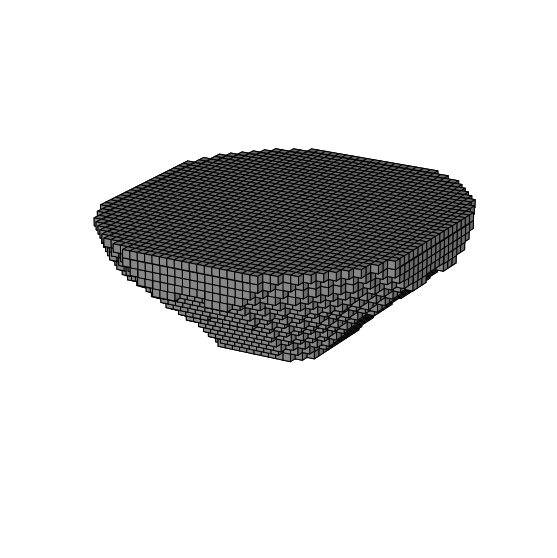

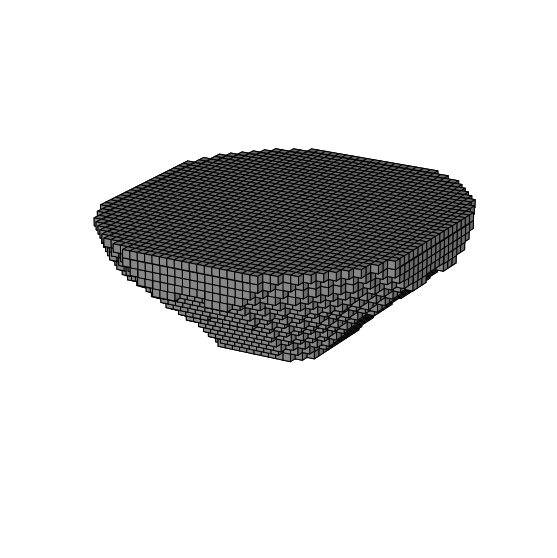

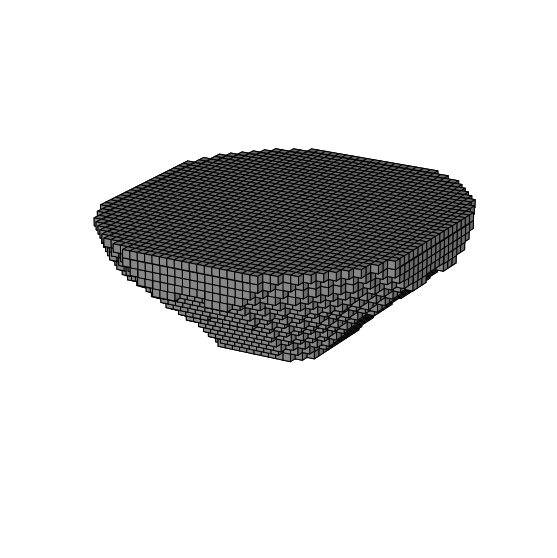

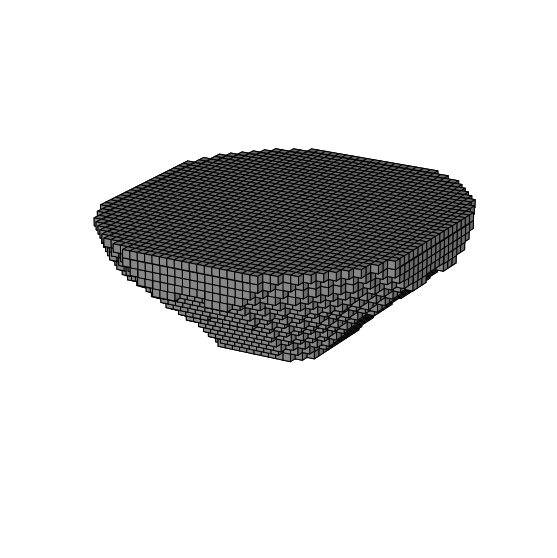

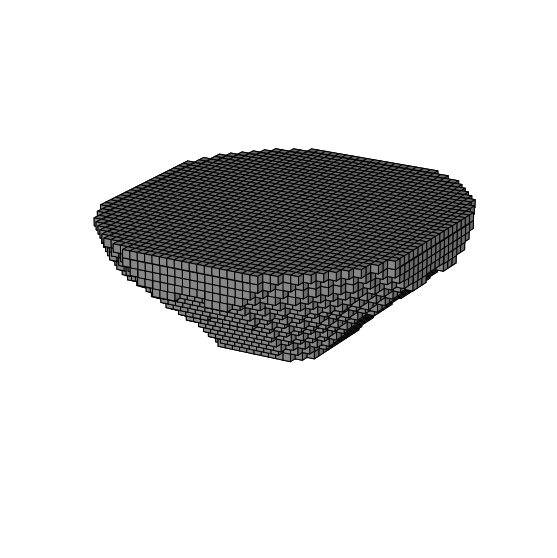

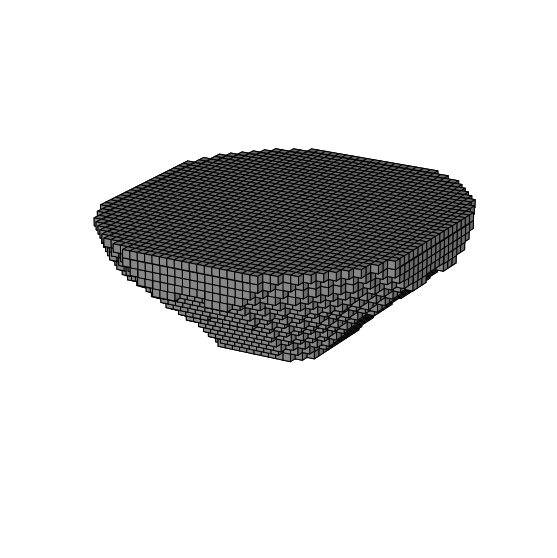

In [1]:
from optimization_sp import run_opt
from optimization_sp import run_batch_opt
import os

# run_batch_opt("Studies/MVP_format_test_1/request_header.json","Studies/MVP_format_test_1","Studies/MVP_format_test_1/bc.json","Resources/mat_lib.json",'Resources/machine.json')

study_folder = "Studies/Engine_Mounting_Bracket_MVP_test"
for i in range(2,3):
    print(i)
    folder_name = "Past/Iter0/"+"config_{}".format(i)
    config_path = os.path.join(study_folder, folder_name)
    run_opt(os.path.join(study_folder,"Past/Iter0/request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"Past/Iter0/constraints.json"),probe = True, test = False)
    run_opt(os.path.join(study_folder,"Past/Iter0/request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"Past/Iter0/constraints.json"),probe = False, test = False)

# study_folder = "Studies/Engine_Mounting_Bracket_MVP_test"
# for i in range(4,5):
#     print(i)
#     folder_name = "config_{}".format(i)
#     config_path = os.path.join(study_folder, folder_name)
#     run_opt(os.path.join(study_folder,"request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"constraints.json"),probe = True, test = False)
#     run_opt(os.path.join(study_folder,"request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"constraints.json"),probe = False, test = False)



In [3]:
import pandas as pd

data_dict = {'Manufacturing Method':[],'Material':[],'mass constraint':[],'cost constraint':[],'time constraint':[],'mass':[],'compliance':[],'nominal time':[],'nominal cost':[]}
design_ai_data = pd.DataFrame(data = data_dict)
folders = os.listdir("Studies/CB")
for folder in folders:
    if "config" in folder:
        if '3' not in folder and '6' not in folder and '9' not in folder:
            df = pd.read_csv("Studies/CB/" + folder + '/final_results.csv')
            design_ai_data = pd.concat([design_ai_data,df])
for folder in folders:
    if "config_3" in folder:
        if 'config_3_3' not in folder and 'config_3_6' not in folder and 'config_3_9' not in folder:
            df = pd.read_csv("Studies/CB/" + folder + '/final_results.csv')
            design_ai_data = pd.concat([design_ai_data,df])
print(design_ai_data)
design_ai_data.to_csv(os.path.join("Studies/CB/" + 'final_results.csv'),index = False)

  Manufacturing Method    Material  mass constraint  cost constraint  \
0          Additive y+      Al6061              0.5            500.0   
0       Subtractive x+      Al6061              0.5            500.0   
0          Additive y+     Ti6Al4V              0.5            500.0   
0       Subtractive x+     Ti6Al4V              0.5            500.0   
0       Subtractive x+  ABSplastic              0.5            500.0   
0          Additive y+  ABSplastic              0.5            500.0   
0          Additive y+      Al6061              0.2            500.0   
0       Subtractive x+      Al6061              0.2            500.0   
0       Subtractive x+     Ti6Al4V              0.2            500.0   
0          Additive y+     Ti6Al4V              0.2            500.0   
0       Subtractive x+  ABSplastic              0.2            500.0   
0          Additive y+  ABSplastic              0.2            500.0   
0          Additive y+      Al6061            100.0           50

In [2]:
import pandas as pd

probe_dict = {'Manufacturing Method':[], 'Material':[], 'mass low':[],'mass high':[],'comp low':[],'comp high':[],'time low':[],'time high':[],'cost low':[],'cost high':[]}
design_ai_data = pd.DataFrame(data = probe_dict)
folders = os.listdir("Studies/CB")
for folder in folders:
    if "config_1" in folder:
        # if '3' not in folder and '6' not in folder and '9' not in folder:
        df = pd.read_csv("Studies/CB/" + folder + '/probe_results.csv')
        design_ai_data = pd.concat([design_ai_data,df])
print(design_ai_data)
design_ai_data.to_csv(os.path.join("Studies/CB/" + 'probe_results.csv'),index = False)

  Manufacturing Method    Material   mass low  mass high      comp low  \
0          Additive y+      Al6061  55.296011   1105.920  3.062603e-08   
0       Subtractive x+      Al6061  55.296011   1105.920  3.062260e-08   
0                EDM z      Al6061  55.296011   1105.920  3.062434e-08   
0          Additive y+     Ti6Al4V  90.726417   1814.528  1.825706e-08   
0       Subtractive x+     Ti6Al4V  90.726417   1814.528  1.825917e-08   
0                EDM z     Ti6Al4V  90.726417   1814.528  1.825670e-08   
0       Subtractive x+  ABSplastic  21.708804    434.176  9.186795e-07   
0          Additive y+  ABSplastic  21.708804    434.176  9.185391e-07   
0                EDM z  ABSplastic  21.708804    434.176  9.185507e-07   

   comp high    time low    time high    cost low    cost high  
0   0.000012  126.954880  1209.097534  224.446411  2588.928223  
0   0.000012  115.000000   175.733566  273.317749   455.518463  
0   0.000012   55.000000   281.176487   93.317760   998.023710  

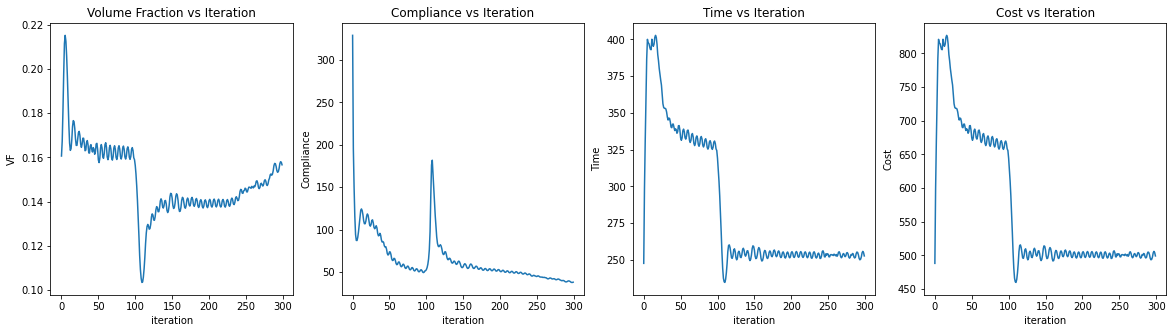

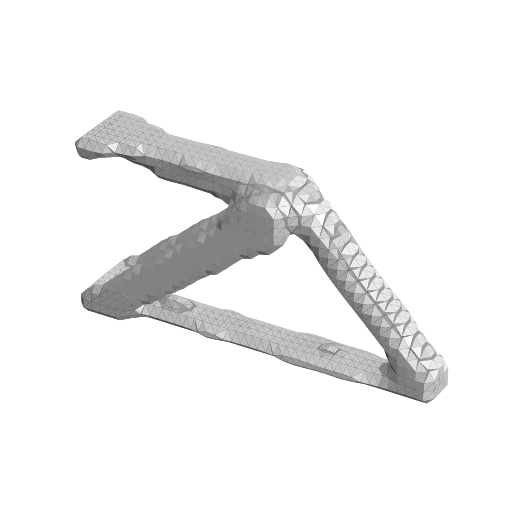

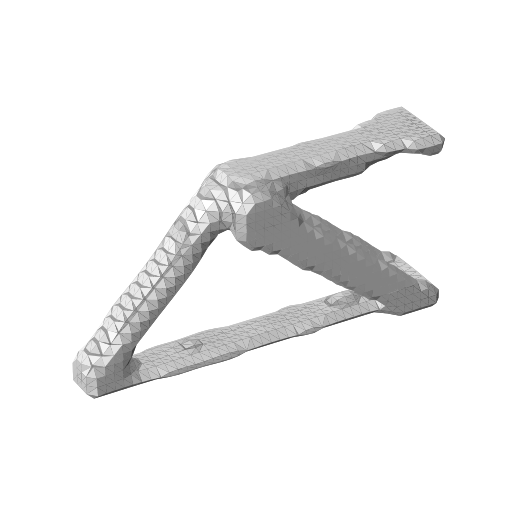

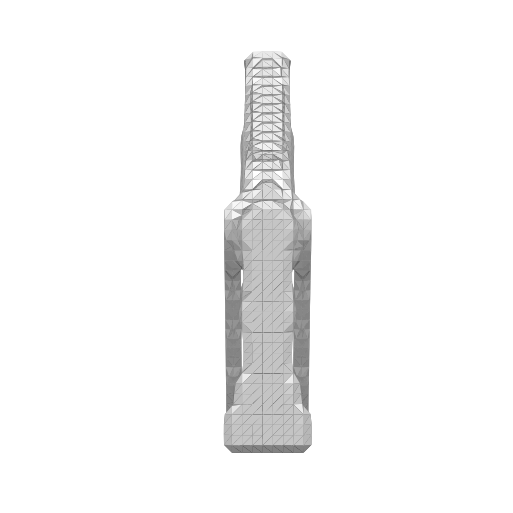

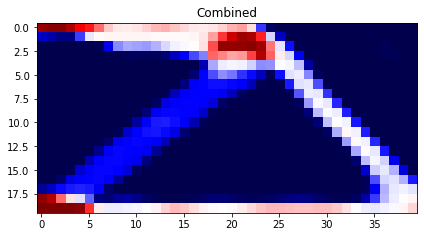

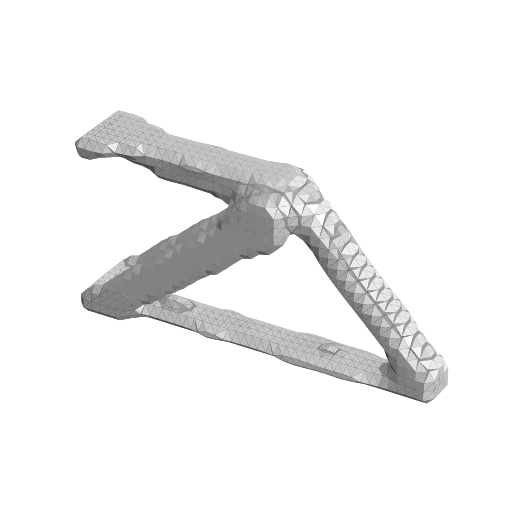

## Result Summary
VF:  tf.Tensor(0.15664467, shape=(), dtype=float32)
Mass: 0.173236 [kg]
Compliance: 1.337267e-01
Time: 253.74 [min]
Cost: 501.48 [$]
max d:  0.10633802925228918
comp:  0.11736050993204117
Status Code: 200, Response: {'status': 'success', 'data': [{'id': 1, 'suppliers': 'Supplier-B', 'order': 'Request-A', 'processPlan': 'SLM-Additive-1', 'leadTime': 1522458, 'earliestStartTime': '2015-11-06T00:00:00+0000', 'earliestFinishTime': '2015-11-23T14:54:18+0000', 'cost': 50199.24}, {'id': 2, 'suppliers': 'Supplier-C', 'order': 'Request-A', 'processPlan': 'SLM-Additive-1', 'leadTime': 1522458, 'earliestStartTime': '2015-11-06T00:00:00+0000', 'earliestFinishTime': '2015-11-23T14:54:18+0000', 'cost': 75298.86}]}


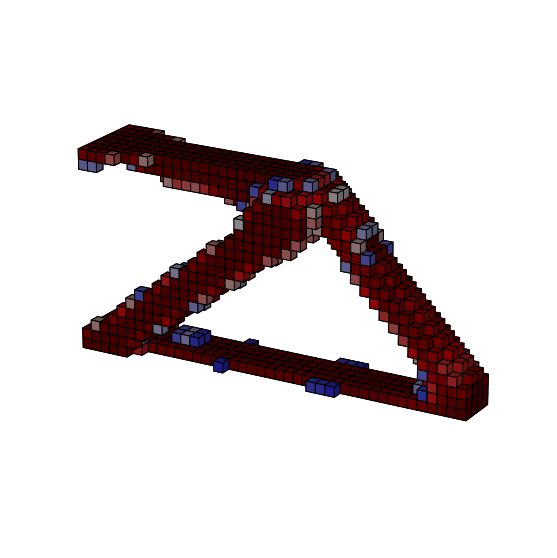

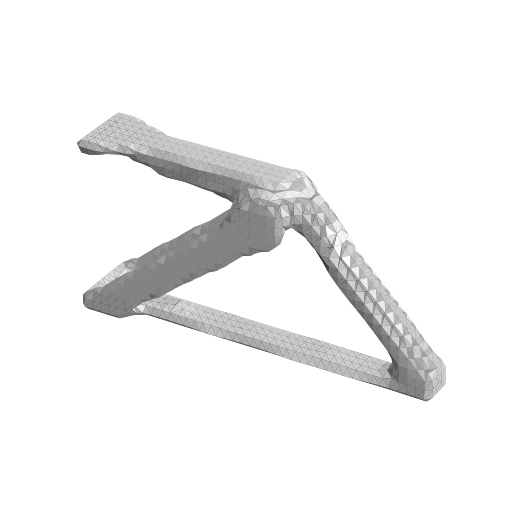

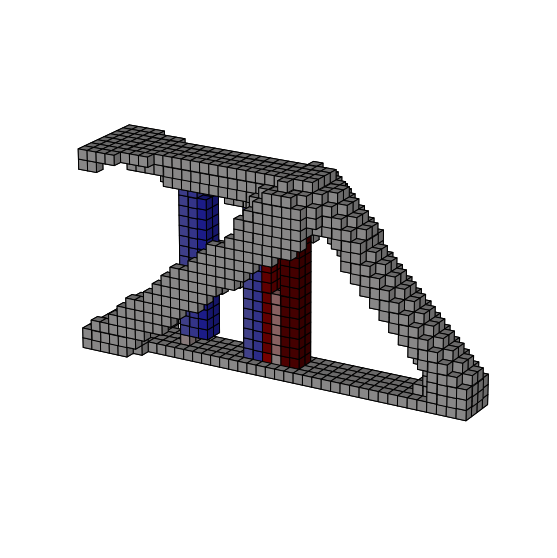

In [1]:
from optimization_sp import run_opt
from optimization_sp import run_batch_opt
import os

# run_batch_opt("Studies/MVP_format_test_1/request_header.json","Studies/MVP_format_test_1","Studies/MVP_format_test_1/bc.json","Resources/mat_lib.json",'Resources/machine.json')

study_folder = "Studies/CB_Scenario_1"
for i in range(1,2):
    print(i)
    folder_name = "Past/Iter0/"+"config_{}".format(i)
    config_path = os.path.join(study_folder, folder_name)
    # run_opt(os.path.join(study_folder,"Past/Iter0/request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"Past/Iter0/constraints.json"),probe = True, test = False)
    run_opt(os.path.join(study_folder,"Past/Iter0/request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"Past/Iter0/constraints.json"),probe = False, test = False)


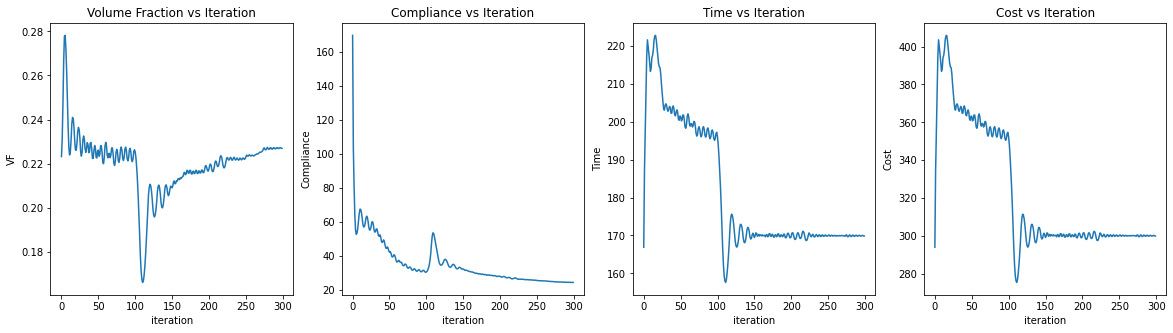

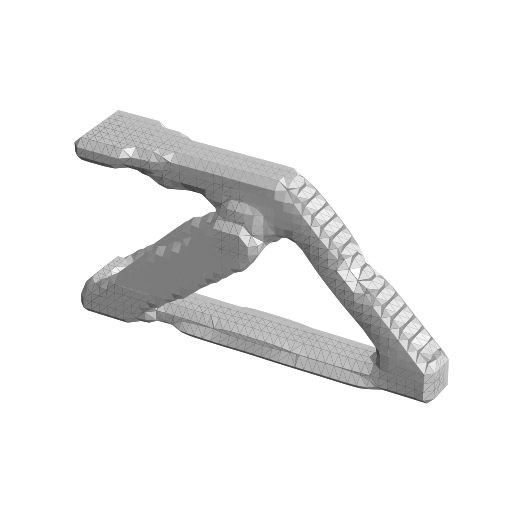

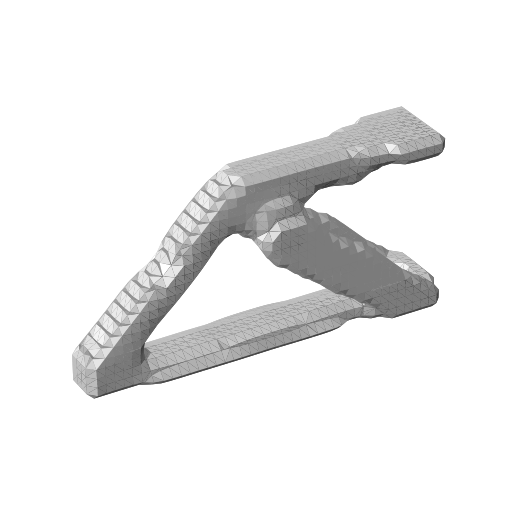

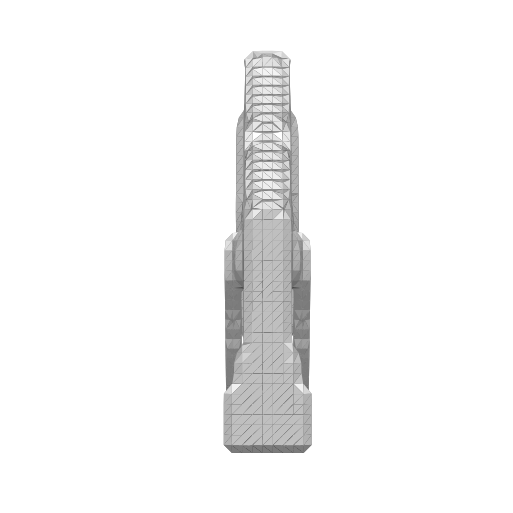

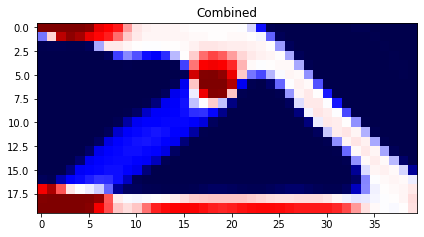

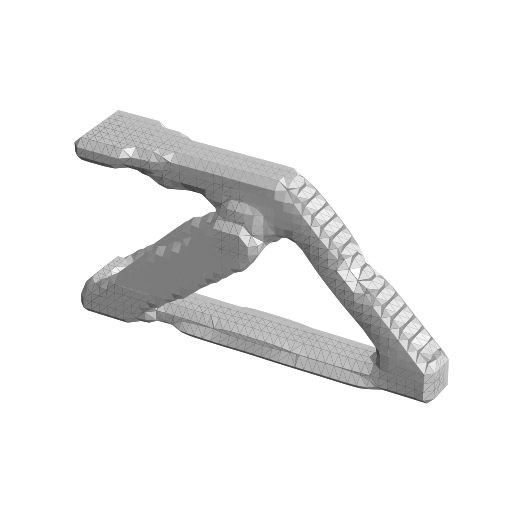

## Result Summary
VF:  tf.Tensor(0.22713795, shape=(), dtype=float32)
Mass: 0.098618 [kg]
Compliance: 2.628272e+00
Time: 169.96 [min]
Cost: 300.11 [$]
max d:  2.895413779362138
comp:  2.445859909057617
Status Code: 200, Response: {'status': 'success', 'data': [{'id': 1, 'suppliers': 'Supplier-B', 'order': 'Request-A', 'processPlan': 'SLM-Additive-1', 'leadTime': 1019732, 'earliestStartTime': '2015-11-06T00:00:00+0000', 'earliestFinishTime': '2015-11-17T19:15:32+0000', 'cost': 30019.99}, {'id': 2, 'suppliers': 'Supplier-C', 'order': 'Request-A', 'processPlan': 'SLM-Additive-1', 'leadTime': 1019732, 'earliestStartTime': '2015-11-06T00:00:00+0000', 'earliestFinishTime': '2015-11-17T19:15:32+0000', 'cost': 45029.99}]}
9
Status Code: 200, Response: {'status': 'success', 'data': [{'id': 1, 'suppliers': 'Supplier-A', 'order': 'Request-A', 'processPlan': '2-Axis-Subtractive-1', 'leadTime': 330000, 'earliestStartTime': '2015-11-06T00:00:00+0000', 'earliestFinishTime': '2015-11-09T19:40:00+0000'

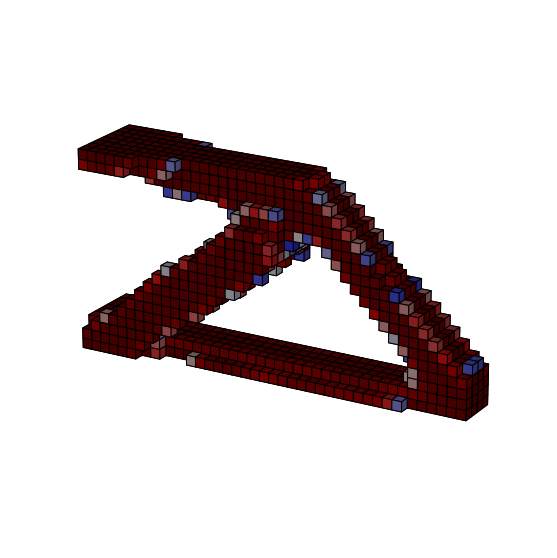

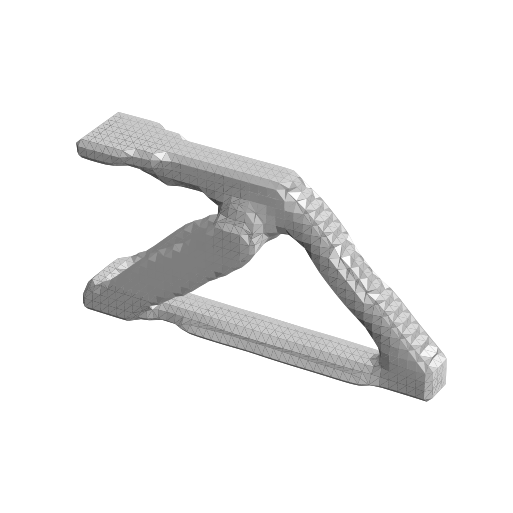

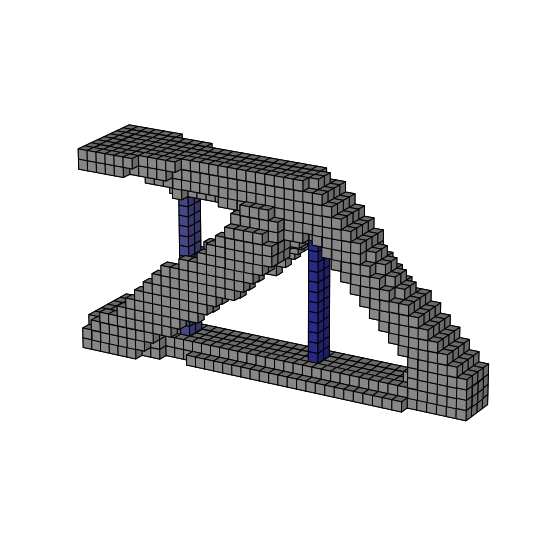

In [1]:
from optimization_sp import run_opt
from optimization_sp import run_batch_opt
import os

study_folder = "Studies/CB_Scenario_1"
for i in range(2,10):
    print(i)
    folder_name = "Past/Iter0/"+"config_{}".format(i)
    config_path = os.path.join(study_folder, folder_name)
    run_opt(os.path.join(study_folder,"Past/Iter0/request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"Past/Iter0/constraints.json"),probe = True, test = False)
    run_opt(os.path.join(study_folder,"Past/Iter0/request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"Past/Iter0/constraints.json"),probe = False, test = False)

study_folder = "Studies/CB_Scenario_1"
for i in range(1,10):
    print(i)
    folder_name = "Past/Iter1/"+"config_{}".format(i)
    config_path = os.path.join(study_folder, folder_name)
    run_opt(os.path.join(study_folder,"Past/Iter1/request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"Past/Iter1/constraints.json"),probe = True, test = False)
    run_opt(os.path.join(study_folder,"Past/Iter1/request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"Past/Iter1/constraints.json"),probe = False, test = False)


study_folder = "Studies/CB_Scenario_1"
for i in range(1,10):
    print(i)
    folder_name = "config_{}".format(i)
    config_path = os.path.join(study_folder, folder_name)
    run_opt(os.path.join(study_folder,"request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"constraints.json"),probe = True, test = False)
    run_opt(os.path.join(study_folder,"request_header.json"),os.path.join(config_path,"mmm.json"), os.path.join(study_folder,"bc.json"), "Resources/mat_lib.json",'Resources/machine.json',os.path.join(study_folder,"constraints.json"),probe = False, test = False)
